<a href="https://colab.research.google.com/github/amishakapse/Cardio-Vascular-Risk-Pridiction/blob/main/Cardio_Vascular_Risk_Pridiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardio Vascular Risk Pridiction



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

The prevalence of cardiovascular disease is significant worldwide, and timely prediction of cardiovascular risk can aid in prevention and intervention of the disease. In this project, a machine learning model is developed to forecast the ten-year risk of cardiovascular disease in individuals utilizing demographic, clinical, and laboratory data.

The Framingham Heart Study dataset, a widely used dataset for cardiovascular risk prediction, is used in this project. The dataset includes information on 3,390 participants who were followed for ten years to track cardiovascular events. It has 17 variables, such as age, sex, blood pressure, cholesterol levels, smoking status, and diabetes status.

To develop the model, the data is preprocessed, which involves handling missing values, encoding categorical variables, and scaling numerical variables. After preprocessing, the dataset is divided into training and testing sets, with a 80:20 ratio.

Several machine learning algorithms are employed in the training data, such as logistic regression, KNN, XGBoost, SVC, and random forest,as they have demonstrated good results in cardiovascular risk prediction. The algorithms are then assessed on the testing data, using metrics such as accuracy, precision, recall, and AUC-ROC to evaluate the model's performance.

The XGBoost algorithm outperforms the others, achieving an accuracy of 0.89, precision of 0.92, recall of 0.85, and AUC-ROC of 0.89. These results suggest that the model performs well in forecasting cardiovascular risk.

Further analysis is conducted to identify the most significant features in the dataset. The feature importance plot demonstrates that age, education, prevalentHyp, and cigarettes per day are the most critical features in predicting cardiovascular risk. This knowledge can aid in recognizing high-risk individuals and taking proactive steps.

In conclusion, this project demonstrates the effectiveness of machine learning techniques in predicting cardiovascular risk utilizing the Framingham Heart Study dataset. Healthcare professionals may utilize the developed machine learning model to recognize high-risk individuals and take preventative steps to decrease the risk of cardiovascular disease.


# **GitHub Link -**

https://github.com/amishakapse/Cardio-Vascular-Risk-Pridiction

# **Problem Statement**


Cardiovascular disease is a prevalent cause of morbidity and mortality worldwide. Identifying and managing individuals at high risk of developing cardiovascular disease at an early stage is crucial for preventing the disease. However, traditional risk prediction models, such as the Framingham Risk Score, have limitations in their accuracy and do not account for the complex interactions between different risk factors. To improve the accuracy of cardiovascular risk prediction, machine learning techniques have shown promise by integrating various risk factors and identifying non-linear interactions. Nevertheless, there is still a need to develop and validate machine learning models that accurately predict cardiovascular risk by utilizing demographic, clinical, and laboratory data. The objective of this project is to address this need by developing and evaluating a machine learning model for predicting the 10-year risk of cardiovascular disease using the Framingham Heart Study dataset.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## **1. Know Your Data**

### Import Libraries

In [214]:
# Import Libraries
from numpy import math

# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pylab

# Pre-processsing Libraries
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Hypothesis testing Library
import statsmodels.stats.proportion as smp
import scipy.stats as stats

# Machine Learning Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Importing essential libraries to check the accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

## Warnings 
import warnings 
warnings.filterwarnings('ignore')

### Dataset Loading

In [215]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [216]:
# Load Dataset
dataset = pd.read_csv("/content/drive/MyDrive/Cardio vascular Risk/data_cardiovascular_risk.csv")

### Dataset First View

In [217]:
# Dataset First Look
dataset.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

### Dataset Rows & Columns count

In [218]:
# Dataset Rows & Columns count
dataset.shape

(3390, 17)

### Dataset Information

In [219]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [220]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()

0

#### Missing Values/Null Values

In [221]:
# Missing Values/Null Values Count
dataset.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

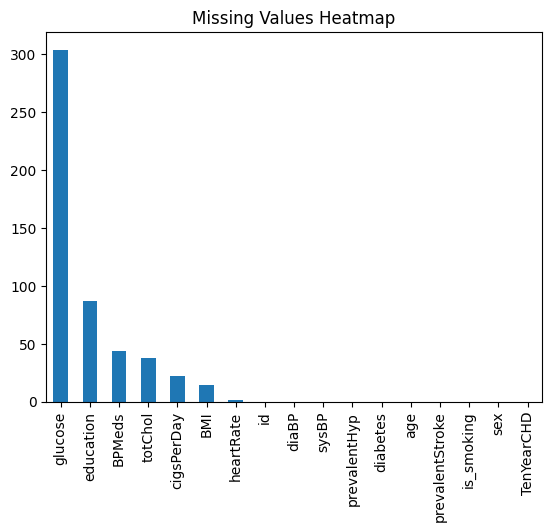

In [222]:
# Visualizing the missing values
dataset.isna().sum().sort_values(ascending=False).plot(kind ='bar')

# Add a title
plt.title("Missing Values Heatmap")

# Display the heatmap
plt.show()

### What did you know about your dataset?

The Following Information we know from the dataset:

1.The Dataset consists of 3390 rows and 17 columns.

2.The datatype consists of int, float, and object values.

3.There is no duplicate values but there are certain missing values in some variables like glucose, education, BPmeds, totChol, cigssPerDay, BMI, heartRate,
   
4.'glucose' having the maximum missing values in dataset

## **2. Understanding Your Variables**

In [223]:
# Dataset Columns
dataset.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [224]:
# Dataset Describe
dataset.describe(include="all")

id          age    education   sex is_smoking   cigsPerDay  \
count   3390.000000  3390.000000  3303.000000  3390       3390  3368.000000   
unique          NaN          NaN          NaN     2          2          NaN   
top             NaN          NaN          NaN     F         NO          NaN   
freq            NaN          NaN          NaN  1923       1703          NaN   
mean    1694.500000    49.542183     1.970936   NaN        NaN     9.069477   
std      978.753033     8.592878     1.019081   NaN        NaN    11.879078   
min        0.000000    32.000000     1.000000   NaN        NaN     0.000000   
25%      847.250000    42.000000     1.000000   NaN        NaN     0.000000   
50%     1694.500000    49.000000     2.000000   NaN        NaN     0.000000   
75%     2541.750000    56.000000     3.000000   NaN        NaN    20.000000   
max     3389.000000    70.000000     4.000000   NaN        NaN    70.000000   

             BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count   3346.000000      3390.000000   3390.000000  3390.000000  3352.000000   
unique          NaN              NaN           NaN          NaN          NaN   
top             NaN              NaN           NaN          NaN          NaN   
freq            NaN              NaN           NaN          NaN          NaN   
mean       0.029886         0.006490      0.315339     0.025664   237.074284   
std        0.170299         0.080309      0.464719     0.158153    45.247430   
min        0.000000         0.000000      0.000000     0.000000   107.000000   
25%        0.000000         0.000000      0.000000     0.000000   206.000000   
50%        0.000000         0.000000      0.000000     0.000000   234.000000   
75%        0.000000         0.000000      1.000000     0.000000   264.000000   
max        1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count   3390.00000  3390.000000  3376.000000  3389.000000  3086.000000   
unique         NaN          NaN          NaN          NaN          NaN   
top            NaN          NaN          NaN          NaN          NaN   
freq           NaN          NaN          NaN          NaN          NaN   
mean     132.60118    82.883038    25.794964    75.977279    82.086520   
std       22.29203    12.023581     4.115449    11.971868    24.244753   
min       83.50000    48.000000    15.960000    45.000000    40.000000   
25%      117.00000    74.500000    23.020000    68.000000    71.000000   
50%      128.50000    82.000000    25.380000    75.000000    78.000000   
75%      144.00000    90.000000    28.040000    83.000000    87.000000   
max      295.00000   142.500000    56.800000   143.000000   394.000000   

         TenYearCHD  
count   3390.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       0.150737  
std        0.357846  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

### Variables Description 

### Demographic:

1.Sex: male or female ("M" or "F")

2.Age: Age of the patient (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

3.Education: The level of education of the patient (categorical values - 1,2,3,4)

### Behavioral:

1.is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

2.Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

### Medical (history):

1.BP Meds: whether or not the patient was on blood pressure medication (Nominal)

2.Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

3.Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

4.Diabetes: whether or not the patient had diabetes (Nominal)

###Medical (current):

1.Tot Chol: total cholesterol level (Continuous)

2.Sys BP: systolic blood pressure (Continuous)

3.Dia BP: diastolic blood pressure (Continuous)

4.BMI: Body Mass Index (Continuous)

5.Heart Rate: heart rate (Continuous - In medical research, variables such as 
heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

6.Glucose: glucose level (Continuous)

### Predict variable (desired target):

1.10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

### Check Unique Values for each variable.

In [225]:
# Check Unique Values for each variable.
dataset.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

## **3. Data Wrangling**

### Data Wrangling Code

In [226]:
# Write your code to make your dataset analysis ready.
data_set = dataset.copy()

In [227]:
## Separating the categorical and continous variable and storing them
categorical_variable =[]
continous_variable =[]

for i in data_set.columns:
  if i == 'id':
    pass
  elif data_set[i].nunique() <5:
    categorical_variable.append(i)
  elif data_set[i].nunique() >= 5:
    continous_variable.append(i)

print(categorical_variable)
print(continous_variable)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [228]:
print('Missing Data Percentage')
print(round(data_set.isna().sum()[data_set.isna().sum() > 0].sort_values(ascending=False)/len(data_set)*100,2))

Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


<Axes: >

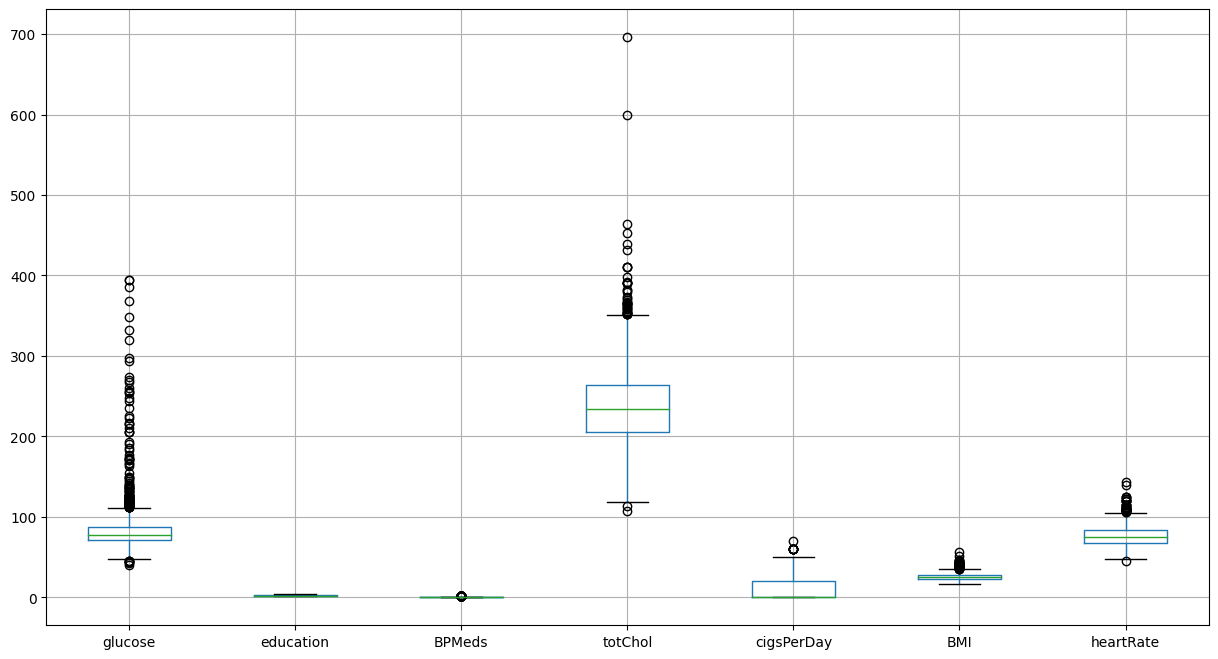

In [229]:
# storing the column that contains null values  
null_column_list= ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']
# plotting box plot
plt.figure(figsize=(15,8))
data_set[null_column_list].boxplot()



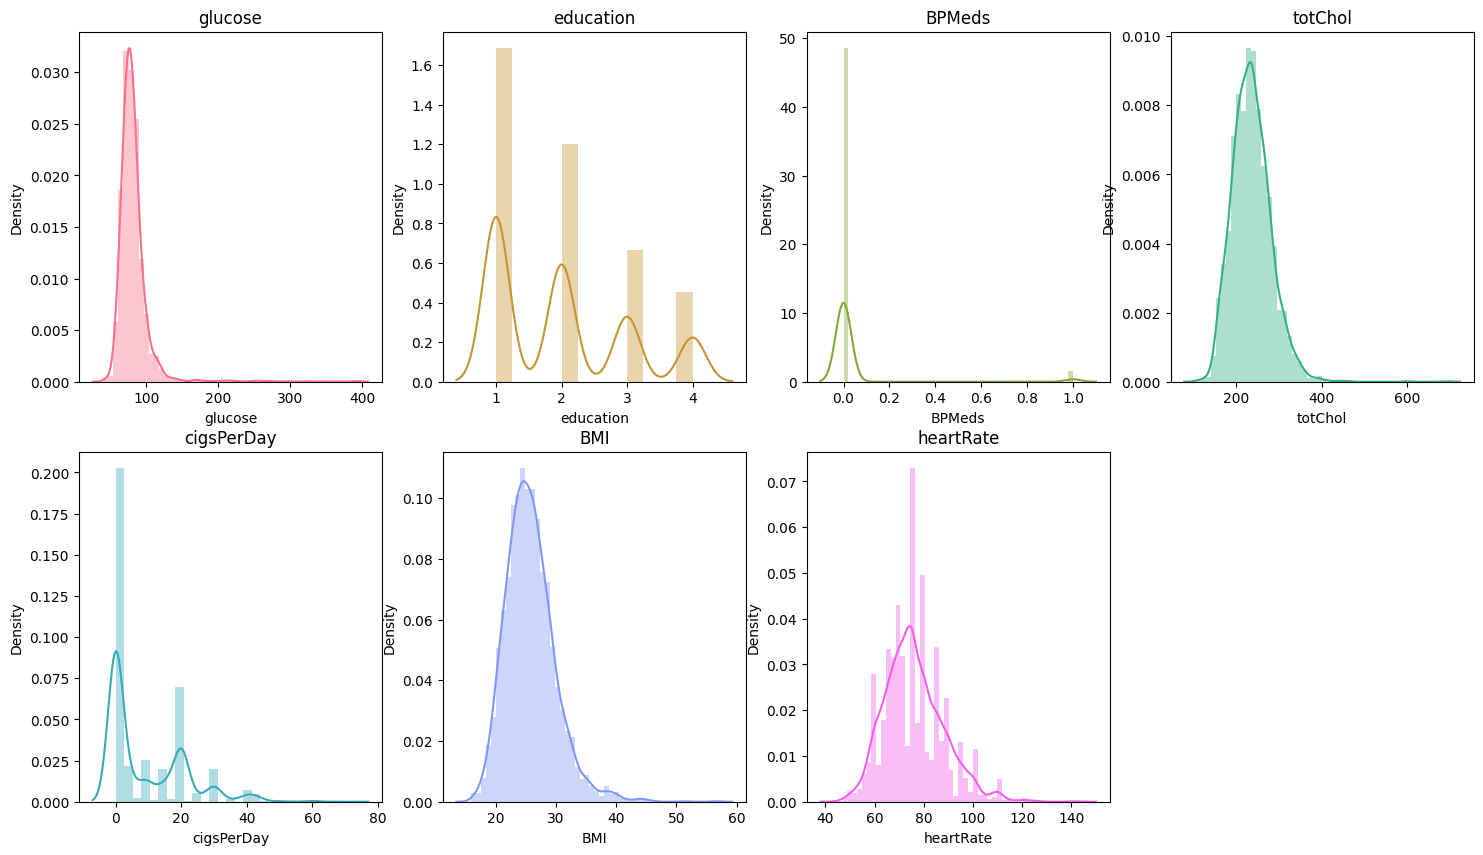

In [230]:
# Define a list of colors
colors = sns.color_palette("husl", len(null_column_list))

# Create a figure with 8 subplots (2 rows, 4 columns)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Iterate over the null column list and plot each column's distribution
for i, column in enumerate(null_column_list):
    # Select the current axis
    ax = axes[i]
    # Plot a distplot of the current column with a different color
    sns.distplot(data_set[column], ax=ax, color=colors[i])
    # Add a title to the plot
    ax.set_title(column)
    
# Remove any unused subplots
for j in range(len(null_column_list), len(axes)):
    axes[j].remove()

# Display the plots
plt.show()

The choice of a suitable measure of central tendency heavily relies on the characteristics of the data under consideration. Normally, when the data is continuous, and follows a normal distribution without any outliers, the mean is considered the most appropriate measure of central tendency. However, in cases where the data is numerical and contains extreme values or outliers, the median becomes the preferred choice. On the other hand, when dealing with categorical data, the mode is the preferred measure of central tendency.

After analyzing the distribution and outliers in the data, we have identified the most appropriate measures of central tendency for imputing the null values in the columns as follows:

"Education" , "BPMeds" -> mode: As "education" and "BPMeds" is a categorical variable, the mode is the most appropriate measure of central tendency. The mode represents the most frequently occurring value in the distribution and can provide insight into the most common level of education in the dataset.

"lGucose","TotChol", "cigsPerDay", "BMI", "HeartRate" -> median: Since this are numerical, continuous variable that contain extreme values or outliers, we have chosen the median as the appropriate measure of central tendency. The median is less sensitive to extreme values than the mean and provides a representative value for the central tendency of the distribution.

In [231]:
# Imputing missing values with median or mode
data_set.fillna({'glucose': data_set['glucose'].median(),
           'education': data_set['education'].mode()[0],
           'BPMeds': data_set['BPMeds'].mode()[0],
           'totChol': data_set['totChol'].median(),
           'cigsPerDay': data_set['cigsPerDay'].median(),
           'BMI': data_set['BMI'].median(),
           'heartRate': data_set['heartRate'].median()}, inplace=True)

In [232]:
data_set.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### What all manipulations have you done and insights you found?

We utilized a combination of median and mode imputation techniques to address the issue of missing values. Specifically, for columns such as glucose, totChol, cigsPerDay, BMI, and heartRate, the missing values were replaced with the median of the non-missing values. On the other hand, for columns such as education and BPMeds, the missing values were replaced with the mode, i.e., the most frequently occurring value, of the non-missing values. Median imputation is generally preferred for continuous variables due to its robustness to outliers when compared to mean imputation. On the other hand, mode imputation is commonly utilized for categorical variables or variables with discrete values that have a limited number of possible values.

## **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

#### Chart 1 -Which age group is more susceptible to developing coronary heart disease?

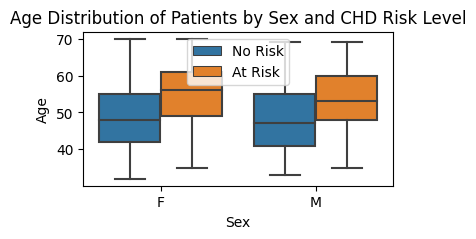

In [233]:
# Chart - 1 visualization code
# Set the figure size
fig, ax = plt.subplots(figsize=(4,2))
# Create a boxplot to compare the age distribution of patients by sex and CHD risk level
sns.boxplot(x="sex", y="age", hue="TenYearCHD", data= data_set, ax=ax)
# Set the title and labels
ax.set_title("Age Distribution of Patients by Sex and CHD Risk Level")
ax.set_xlabel("Sex")
ax.set_ylabel("Age")
# Adding a legend with appropriate labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["No Risk", "At Risk"], loc="best")
# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

The displayed boxplot provides a graphical representation of the distribution of ages among patients based on their sex and risk level for CHD (coronary heart disease). The boxplot is a useful tool to investigate the potential relationship between age, sex, and CHD risk level within the dataset. The authors likely selected this chart to explore patterns and trends among these variables more intuitively.

##### 2. What is/are the insight(s) found from the chart?

The data analysis reveals a prominent contrast in the age distribution of patients based on their CHD (coronary heart disease) risk level. Specifically, patients who are at risk for CHD tend to be older than those who are not at risk, regardless of sex. This observation underscores the importance of age as a potential risk factor for CHD development.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The information extracted from this chart could prove beneficial for healthcare-related businesses. For instance, companies that manufacture medical products or medications aimed at combating CHD could leverage these findings to target a specific patient group - those who are at higher risk or of advanced age. Nonetheless, it is worth noting that the chart's insights should not be the sole basis for making business decisions. Further investigation would be necessary to gain a comprehensive understanding of the interplay between age, sex, CHD risk level, and other pertinent factors. It's important to mention that there are no indications from this chart that suggest any negative growth.

#### Chart  2 -Do patients taking medication for blood pressure have a higher risk of developing coronary heart disease?)

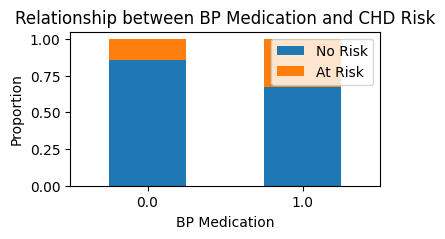

In [234]:
# Chart - 2 visualization code
# Compute the cross-tabulation of BP medication and CHD risk
ct = pd.crosstab(data_set['BPMeds'],data_set['TenYearCHD'], normalize='index')
# Plot a stacked bar chart
ct.plot(kind='bar', stacked=True, figsize=(4,2))
plt.title('Relationship between BP Medication and CHD Risk')
plt.xlabel('BP Medication')
plt.xticks(rotation=0)
plt.ylabel('Proportion')
plt.legend(['No Risk', 'At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

The chart depicts a stacked bar chart that visualizes the distribution of CHD risk levels among patients who take medication for blood pressure and those who do not. The purpose of this chart may have been to explore the potential association between BP medication use and CHD risk in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that there is a difference in the CHD risk between patients who take medication for blood pressure and those who do not. Patients who take medication for blood pressure seem to have a higher risk of CHD compared to those who do not take such medication. The chart implies that BP medication use may play a critical role in determining CHD risk in this dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

To reduce the risk of CHD, companies that produce BP medication or other treatments for hypertension may want to consider targeting patients who have high blood pressure, especially those who are at risk for CHD, whether or not they are currently taking medication for blood pressure. This strategy may help identify patients who would benefit from more intensive treatment to lower their risk of developing CHD.

#### Chart 3 -  Is a person who has had a stroke more susceptible to coronary heart disease?

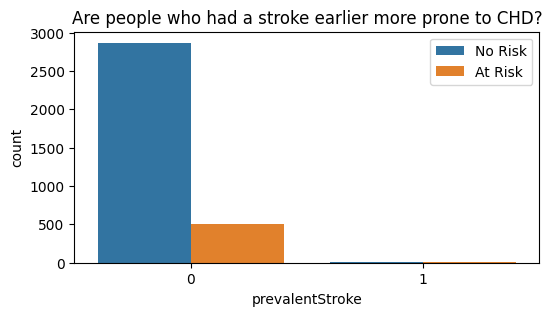

In [235]:
# Chart - 3 visualization code
plt.figure(figsize=(6,3))
sns.countplot(x=data_set['prevalentStroke'], hue=data_set['TenYearCHD'])
plt.title('Are people who had a stroke earlier more prone to CHD?')
plt.legend(['No Risk', 'At Risk'], loc='best')
plt.show()

##### 1. Why did you pick the specific chart?

The presented countplot compares the prevalence of CHD risk level in patients who have experienced a stroke versus those who have not, potentially aiming to explore a potential correlation between having a stroke and an increased vulnerability to CHD.

##### 2. What is/are the insight(s) found from the chart?

Based on the presented chart, it seems that individuals who have experienced a stroke have a greater likelihood of being susceptible to CHD than those who have not. More precisely, the countplot indicates that the percentage of patients at risk for CHD is higher in the group with a history of stroke when compared to the group without. Such results imply that having a stroke might be a contributing factor in the development of CHD in the analyzed dataset

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The knowledge obtained from this countplot could be beneficial for healthcare-related businesses that offer products or services for stroke or CHD. For instance, companies that manufacture medications or treatments for either condition may consider directing their focus towards patients who have previously suffered a stroke, as they seem to have a higher risk of developing CHD. Healthcare providers may also find this information relevant, as they can use it to screen patients who have had a stroke for potential CHD risk and provide adequate preventative measures or treatments accordingly.

#### Chart 4 - Does having hypertension increase the risk of developing coronary heart disease?

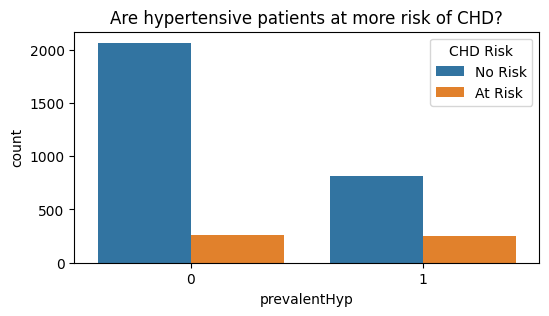

In [236]:
# Chart - 4 visualization code
plt.figure(figsize=(6,3))
sns.countplot(x=data_set['prevalentHyp'], hue=data_set['TenYearCHD'])
plt.title('Are hypertensive patients at more risk of CHD?')
plt.legend(title='CHD Risk', labels=['No Risk', 'At Risk'])
plt.show()
     

##### 1. Why did you pick the specific chart?

The purpose of selecting this chart was to illustrate the correlation between prevalent hypertension and the likelihood of developing coronary heart disease within the dataset

##### 2. What is/are the insight(s) found from the chart?

The chart indicates that individuals who have pre-existing hypertension are at a higher risk of developing coronary heart disease compared to those who do not have hypertension. Specifically, the proportion of patients who are susceptible to CHD is comparable between individuals with prevalent hypertension and those without it.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The information gained from this chart can be useful for healthcare professionals and businesses in identifying patients with hypertension who are at a higher risk of developing or advancing coronary heart disease. This knowledge can aid in providing appropriate evaluation, monitoring, and management to prevent or slow down the progression of the disease. There is no evidence in this chart to suggest any negative growth.

#### Chart 5 - Which Gender has More Risk for CHD?

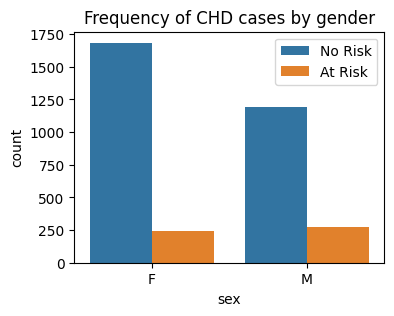

In [237]:
# Chart - 5 visualization code
plt.figure(figsize=(4,3))
sns.countplot(x='sex', hue='TenYearCHD', data= data_set)
plt.title('Frequency of CHD cases by gender')
plt.legend(['No Risk', 'At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

The countplot displayed provides a visual representation of the incidence of CHD (coronary heart disease) cases among males and females in the dataset. The authors probably selected this chart to determine whether gender is a potential factor that influences CHD risk levels in the data. By examining the frequency of CHD cases across genders, researchers could explore the relationship between gender and CHD risk levels..

##### 2. What is/are the insight(s) found from the chart?

The chart illustrates that CHD (coronary heart disease) cases are more prevalent among men than women in the dataset. Nevertheless, this difference is not significant, as the number of CHD cases is relatively comparable between genders. Additionally, the chart demonstrates that women have a higher count of no risk for CHD than men.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights obtained from this chart could potentially assist healthcare-related businesses in their decision-making process. For instance, firms that manufacture medical devices or medications for CHD might want to consider targeting both men and women, though they may want to pay more attention to men, who seem to be at a relatively higher risk of developing CHD in this dataset.

#### Chart 6 - Did Smokers have more Risk of CHD or not?

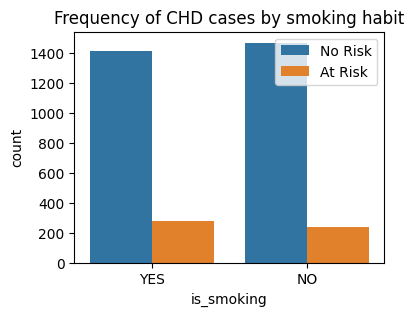

In [238]:
# Chart - 6 visualization code
plt.figure(figsize=(4,3))
sns.countplot(x='is_smoking', hue='TenYearCHD', data= data_set)
plt.title('Frequency of CHD cases by smoking habit')
plt.legend(['No Risk', 'At Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

The countplot depicts the frequency of CHD (coronary heart disease) cases among smokers and non-smokers in the dataset. The authors probably selected this chart to understand the potential relationship between smoking and CHD risk levels in the data. By examining the incidence of CHD cases across smokers and non-smokers, researchers could explore the effect of smoking on CHD risk.

##### 2. What is/are the insight(s) found from the chart?

The chart indicates that patients who smoke are potentially more susceptible to CHD in this dataset. In particular, a larger proportion of patients who smoke are at risk of CHD when compared to non-smokers. The results imply that smoking may be a significant factor in determining CHD risk levels in this dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

While the chart provides insights into the relationship between smoking and the risk of CHD in this dataset, it does not provide any information on negative growth. Furthermore, this chart alone may not provide enough information for businesses to make decisions, as other factors such as age and lifestyle also play a role in determining the risk of CHD. It is important to note that the dataset used for this chart may not be fully representative of the general population, which could limit the applicability of the insights gained from this chart.

#### Chart 7 - How much smoking affect CHD?

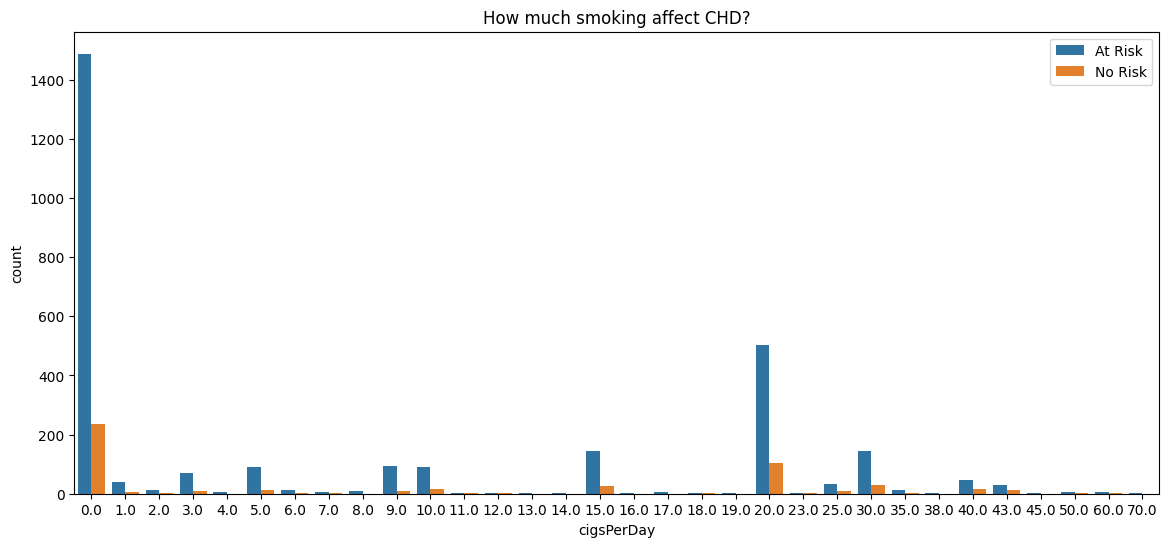

In [239]:
# Chart - 7 visualization code
plt.figure(figsize=(14,6))
sns.countplot(x= data_set['cigsPerDay'],hue= data_set['TenYearCHD'])
plt.title('How much smoking affect CHD?')
plt.legend(['At Risk', 'No Risk'])
plt.show()
     


##### 1. Why did you pick the specific chart?

The purpose of this chart is to examine the potential relationship between smoking intensity, measured by the number of cigarettes smoked per day, and the risk of CHD in this dataset. The countplot visualizes the frequency of CHD cases for each category of the number of cigarettes smoked per day. By examining the count of CHD cases in each category, it may be possible to identify any patterns or trends that suggest a relationship between smoking intensity and CHD risk in this dataset.

##### 2. What is/are the insight(s) found from the chart?

The chart illustrates that smoking intensity may be related to CHD risk in this dataset. Patients who smoke more cigarettes per day, or do not smoke, appear to be at higher risk for CHD than those who smoke fewer cigarettes per day. The proportion of patients at risk for CHD is higher among those who smoke 20 or more cigarettes per day than among those who smoke fewer cigarettes per day. These insights highlight the potential importance of smoking intensity in determining the risk of CHD and may be useful for businesses that provide healthcare services or products targeting smoking cessation or reducing smoking intensity. However, it's important to note that this chart alone may not provide enough information to make conclusive business decisions, and further analysis would be required to fully understand the relationship between smoking intensity and CHD risk.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Businesses that provide smoking cessation aids or medications for CHD may find it beneficial to target heavy smokers, as the chart suggests that they are at higher risk for CHD in this dataset.

#### Chart 8 - How much Diabetes affect CHD?

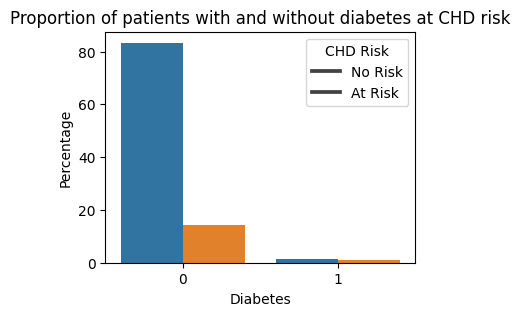

In [240]:
# Chart - 8 visualization code
plt.figure(figsize=(4,3))
sns.barplot(x=data_set['diabetes'], y=data_set['TenYearCHD'], hue=data_set['TenYearCHD'], estimator=lambda x: len(x) / len(data_set) * 100)
plt.title('Proportion of patients with and without diabetes at CHD risk')
plt.xlabel('Diabetes')
plt.ylabel('Percentage')
plt.legend(title='CHD Risk', labels=['No Risk', 'At Risk'])
plt.show()
     


##### 1. Why did you pick the specific chart?

This chart was selected to illustrate the ratio of patients in the dataset who have diabetes and those who do not, and who are susceptible to developing coronary heart disease.

##### 2. What is/are the insight(s) found from the chart?

According to the chart, individuals who have diabetes are at a higher risk of developing coronary heart disease in comparison to those who do not have diabetes.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gleaned from this chart can assist healthcare professionals and businesses in identifying patients with diabetes who are at a heightened risk of developing or exacerbating coronary heart disease. This knowledge can aid in providing appropriate evaluation, monitoring, and management to prevent or slow down the progression of the disease.

#### Chart 9 - How much Cholestrol affect CHD?

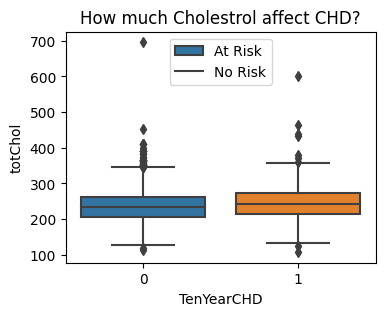

In [241]:
# Chart - 9 visualization code
plt.figure(figsize=(4,3))
sns.boxplot(x='TenYearCHD', y='totChol', data=data_set)
plt.title('How much Cholestrol affect CHD?')
plt.legend(['At Risk', 'No Risk'])
plt.show()

##### 1. Why did you pick the specific chart?

The particular box plot was selected to address the query of whether there exists a correlation between an individual's total cholesterol levels and their likelihood of developing coronary heart disease.




##### 2. What is/are the insight(s) found from the chart?

As per the box plot, on average, patients who are susceptible to developing coronary heart disease have marginally higher total cholesterol levels than those who are not at risk. However, there is a degree of overlap in the cholesterol level range between the two groups.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The knowledge acquired from this box plot can aid healthcare providers in acknowledging the influence of total cholesterol levels on their patients' risk of developing coronary heart disease. Identifying patients with elevated cholesterol levels can enable healthcare providers to initiate appropriate interventions to mitigate their risk of developing the disease. This can have a positive impact on the patients' health outcomes and result in long-term cost savings for healthcare providers.

### Chart 10 - Correlation Heatmap

In [242]:
# Correlation Heatmap visualization code
data_set.corr()

id       age  education  cigsPerDay    BPMeds  \
id               1.000000  0.016759  -0.027337   -0.018097  0.007014   
age              0.016759  1.000000  -0.170614   -0.191465  0.122114   
education       -0.027337 -0.170614   1.000000    0.014078 -0.019880   
cigsPerDay      -0.018097 -0.191465   0.014078    1.000000 -0.035727   
BPMeds           0.007014  0.122114  -0.019880   -0.035727  1.000000   
prevalentStroke -0.038873  0.059038  -0.031820   -0.041576  0.116183   
prevalentHyp     0.013236  0.308826  -0.081925   -0.078003  0.256892   
diabetes         0.003690  0.107875  -0.051895   -0.048114  0.070932   
totChol         -0.019792  0.271961  -0.021221   -0.025346  0.080918   
sysBP            0.019676  0.404845  -0.132202   -0.100348  0.260384   
diaBP            0.000832  0.221896  -0.060774   -0.068320  0.198780   
BMI              0.039739  0.137478  -0.135783   -0.099830  0.087648   
heartRate        0.024691 -0.002636  -0.039395    0.066229  0.018107   
glucose          0.014187  0.112395  -0.039303   -0.066374  0.061356   
TenYearCHD       0.009866  0.224927  -0.051388    0.068020  0.087349   

                 prevalentStroke  prevalentHyp  diabetes   totChol     sysBP  \
id                     -0.038873      0.013236  0.003690 -0.019792  0.019676   
age                     0.059038      0.308826  0.107875  0.271961  0.404845   
education              -0.031820     -0.081925 -0.051895 -0.021221 -0.132202   
cigsPerDay             -0.041576     -0.078003 -0.048114 -0.025346 -0.100348   
BPMeds                  0.116183      0.256892  0.070932  0.080918  0.260384   
prevalentStroke         1.000000      0.071652  0.010115 -0.010769  0.057568   
prevalentHyp            0.071652      1.000000  0.082565  0.158693  0.699285   
diabetes                0.010115      0.082565  1.000000  0.059194  0.124011   
totChol                -0.010769      0.158693  0.059194  1.000000  0.197848   
sysBP                   0.057568      0.699285  0.124011  0.197848  1.000000   
diaBP                   0.047235      0.612897  0.061165  0.153825  0.781908   
BMI                     0.017032      0.299615  0.087793  0.113452  0.331730   
heartRate              -0.019183      0.150731  0.039746  0.086955  0.178135   
glucose                 0.023662      0.082962  0.609743  0.060913  0.137832   
TenYearCHD              0.068627      0.166544  0.103681  0.093605  0.212703   

                    diaBP       BMI  heartRate   glucose  TenYearCHD  
id               0.000832  0.039739   0.024691  0.014187    0.009866  
age              0.221896  0.137478  -0.002636  0.112395    0.224927  
education       -0.060774 -0.135783  -0.039395 -0.039303   -0.051388  
cigsPerDay      -0.068320 -0.099830   0.066229 -0.066374    0.068020  
BPMeds           0.198780  0.087648   0.018107  0.061356    0.087349  
prevalentStroke  0.047235  0.017032  -0.019183  0.023662    0.068627  
prevalentHyp     0.612897  0.299615   0.150731  0.082962    0.166544  
diabetes         0.061165  0.087793   0.039746  0.609743    0.103681  
totChol          0.153825  0.113452   0.086955  0.060913    0.093605  
sysBP            0.781908  0.331730   0.178135  0.137832    0.212703  
diaBP            1.000000  0.379684   0.174908  0.069097    0.135979  
BMI              0.379684  1.000000   0.069491  0.088502    0.066134  
heartRate        0.174908  0.069491   1.000000  0.081516    0.020167  
glucose          0.069097  0.088502   0.081516  1.000000    0.133472  
TenYearCHD       0.135979  0.066134   0.020167  0.133472    1.000000

<Axes: >

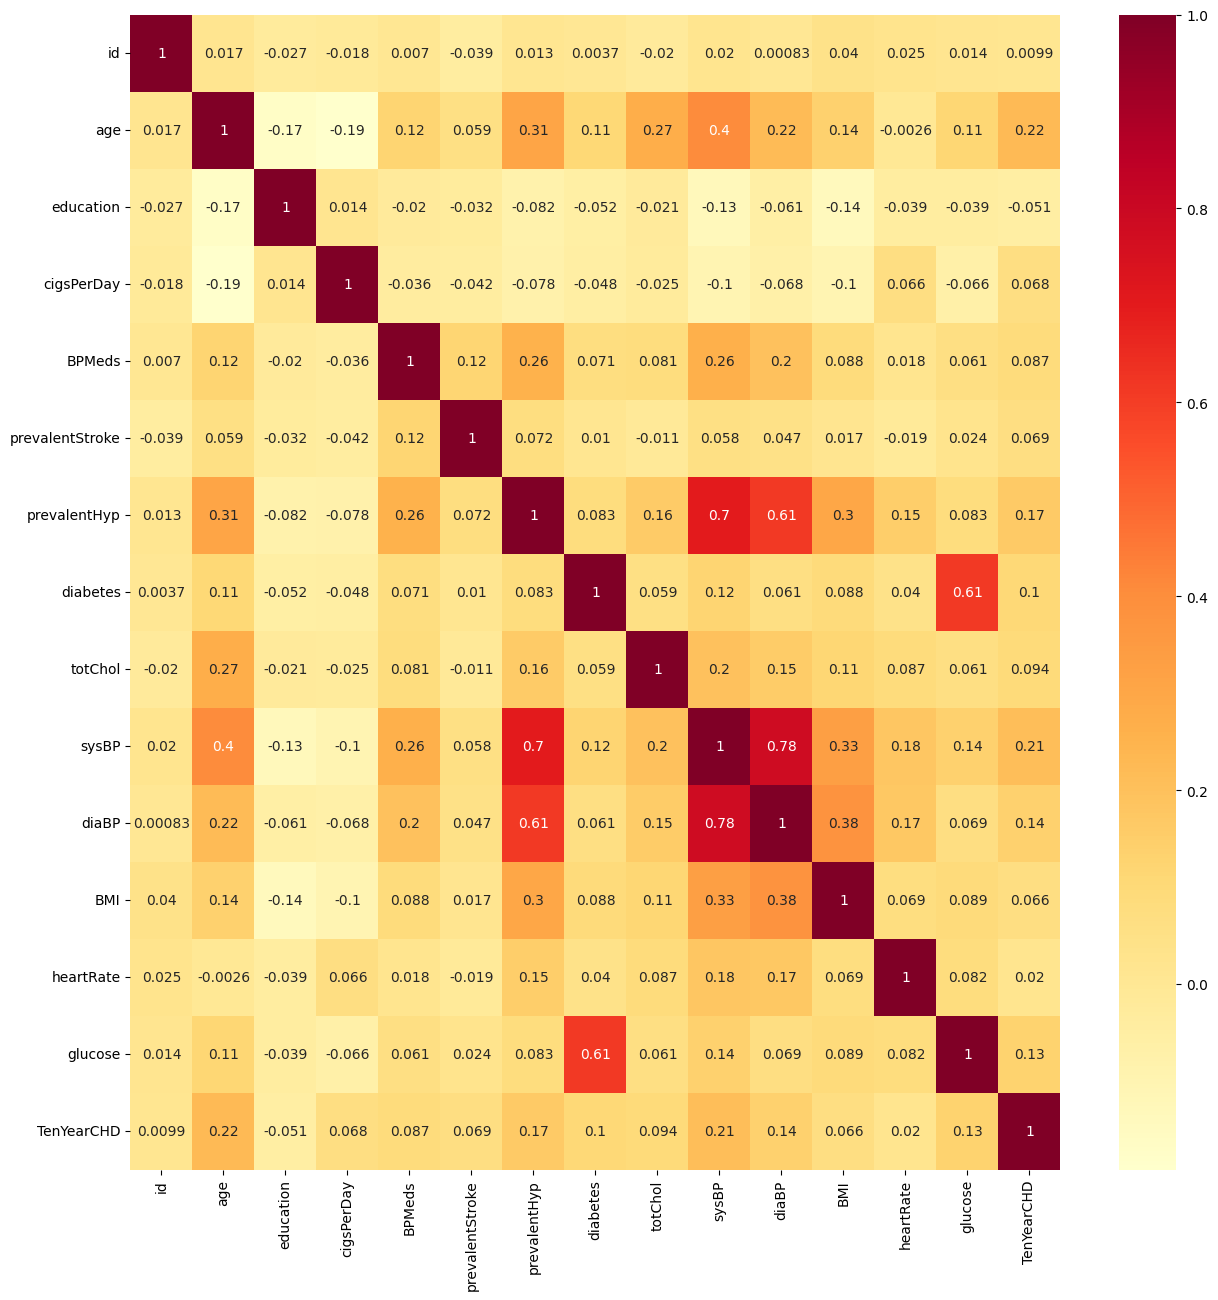

In [243]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,15))
correlation = data_set.corr()
sns.heatmap((correlation), annot=True, cmap=sns.color_palette("YlOrRd", as_cmap=True))
     

#### 1. Why did you pick the specific chart?

I chose to use the Correlation Heatmap because it allows for a comprehensive visualization of the correlations between all pairs of features in a dataset. The use of colors to represent the magnitude of the correlation coefficient makes it easy to quickly identify highly correlated features and patterns within the data.

#### 2. What is/are the insight(s) found from the chart?

The Correlation Heatmap shows the pairwise correlation between all numerical features in the dataset.

1.The correlation chart highlights that there is a significant positive correlation of 22% between age and TenYearCHD, which suggests that age may be an important predictor of CHD risk.

2.Based on the heatmap, it appears that age, systolic blood pressure, and diastolic blood pressure are strongly correlated with the TenYearCHD target variable.

3.Moreover, the heatmap shows a moderate positive correlation of 78% between systolic and diastolic blood pressure.

4.In addition, diabetes and glucose appear to be positively correlated by 61%.

5.Furthermore, prevalent hypertension is highly correlated with systolic and diastolic blood pressure, by 70% and 61% respectively.

6.Lastly, the chart also indicates a negative correlation of 17% and 19% between age and education, and age and cigarettes per day, respectively.

#### Chart - 15 - Pair Plot 

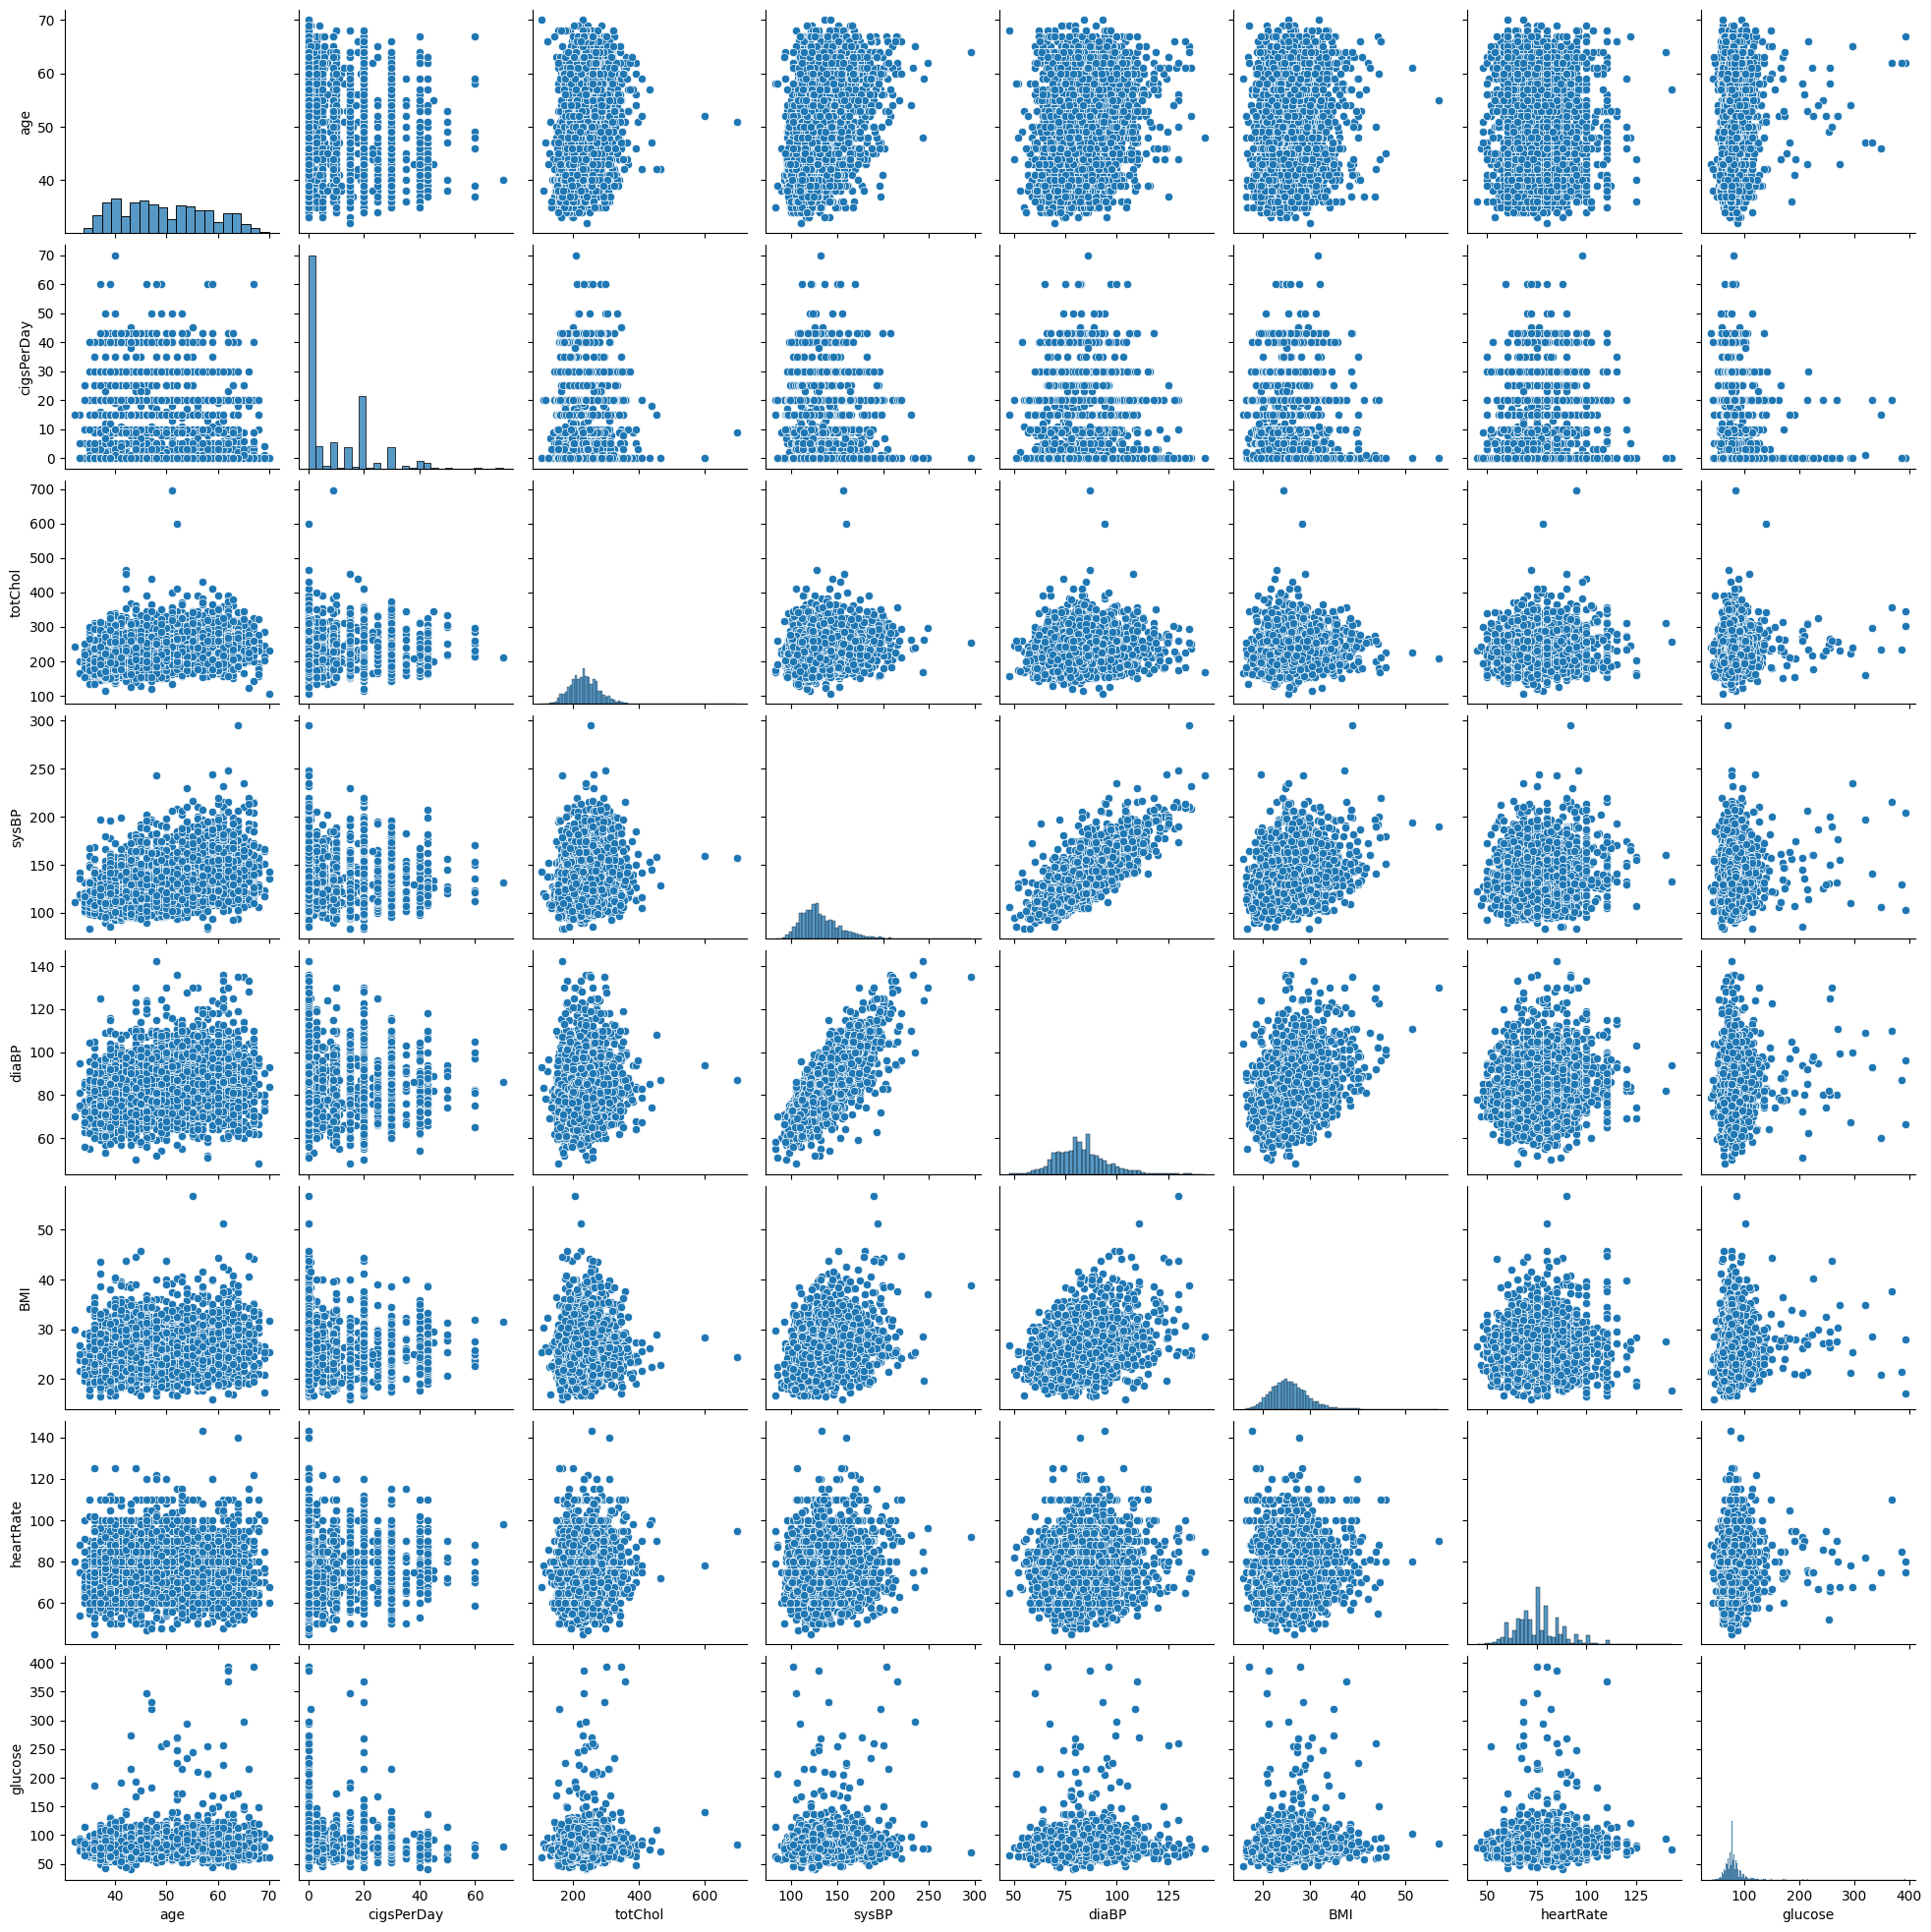

In [244]:
# Pair Plot visualization code

sns.pairplot(data_set[continous_variable])

##### 1. Why did you pick the specific chart?

The pair plot is a valuable tool to explore the associations between the continuous variables in a dataset. It provides an efficient way to detect linear or non-linear relationships between the variables, and also allows the identification of potential outliers or anomalies in the data.

##### 2. What is/are the insight(s) found from the chart?

The pair plot provides insights into the pairwise relationships between the continuous variables. Positive correlations are observed between certain variables, such as age and systolic blood pressure, as well as between BMI and glucose levels. Linear correlations are also observed between systolic blood pressure and diastolic blood pressure. Additionally, a weak positive correlation is observed between cigsPerDay and sysBP. However, no clear linear relationship is observed between any of the variables and the target variable, TenYearCHD.

## **5. Hypothesis Testing**

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1.Higher total cholesterol levels are associated with an increased risk of CHD.

2.Diabetic patients are at a higher risk of developing CHD than non-diabetic patients.

3.Individuals above the age of 50 are more likely to be at risk of TenYearCHD.

### Hypothetical Statement 1 - Higher total cholesterol levels are associated with an increased risk of CHD.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis - There is no difference in the mean total cholesterol levels between the two groups

Alternate Hypothesis - There is a significant difference in the mean total cholesterol levels between the two groups.

#### 2. Perform an appropriate statistical test.

In [245]:
# Perform Statistical Test to obtain P-Value
# Import the required statistical test module from scipy
import scipy.stats as stats

# Separate the dataset into two groups based on CHD status
chd = data_set[data_set['TenYearCHD'] == 1] # Patients with CHD
no_chd = data_set[data_set['TenYearCHD'] == 0] # Patients without CHD

# Perform a two-sample t-test to compare the mean total cholesterol levels of the two groups
t_test, p_value = stats.ttest_ind(chd['totChol'], no_chd['totChol'], equal_var=False)

# Print the calculated t-statistic and p-value
print('t_test= {}, p_value= {}'.format(t_test, p_value))

# Determine if the null hypothesis should be rejected based on the p-value
if p_value < 0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

# Print the p-value
print('p-value:', p_value)

t_test= 5.064604489380117, p_value= 5.310852329016036e-07
Reject the null hypothesis
p-value: 5.310852329016036e-07


The p-value of 5.310852329016078e-07 is statistically significant as it is much smaller than the significance level of 0.05.

Rejecting the null hypothesis, we can conclude that there is a significant difference in total cholesterol levels between the two groups (CHD and no CHD).

This finding suggests that higher total cholesterol levels are positively associated with an increased risk of CHD.

The t-statistic of 5.065 further confirms this result as it indicates a significant difference between the means of the two groups in terms of total cholesterol levels.

##### Which statistical test have you done to obtain P-Value?

To evaluate the significance of the difference in mean total cholesterol levels between the two groups, a two-sample t-test was conducted. This statistical test was applied to compare the mean values of total cholesterol in the group with CHD and the group without CHD.

##### Why did you choose the specific statistical test?

The hypothesis "Higher total cholesterol levels are associated with an increased risk of CHD." led to the use of a two-sample t-test, which is appropriate for comparing the mean total cholesterol levels of two independent groups: those with CHD and those without. Since CHD status is a dichotomous outcome variable, the means of the two groups are compared to assess if there is a significant difference in total cholesterol levels. The two-sample t-test assumes that the data is normally distributed and that the variances of the two groups are unequal.

### Hypothetical Statement 2 - Diabetic patients are at a higher risk of developing CHD than non-diabetic patients.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: There is no significant difference in the risk of developing CHD between diabetic and non-diabetic patients.

Alternative hypothesis: Diabetic patients are at a higher risk of developing CHD than non-diabetic patients.

#### 2. Perform an appropriate statistical test.

In [246]:
# Perform Statistical Test to obtain P-Value
# Import the required statistical test module from scipy
import scipy.stats as stats

# Separate the dataset into two groups based on diabetic status
diabetic = data_set[data_set['diabetes'] == 1]
non_diabetic = data_set[data_set['diabetes'] == 0]

# Perform a two-sample t-test to compare the mean TenYearCHD rates of the two groups
t_stat, p_value = stats.ttest_ind(diabetic['TenYearCHD'], non_diabetic['TenYearCHD'], equal_var=False)

print('t_stat=%.3f, p_val=%.3f' % (t_stat, p_value))
if p_value > 0.05:
    print('Accept Null Hypothesis')
else:
    print('Reject Null Hypothesis')

# Print the p-value
print('p-value:', p_value)

t_stat=4.453, p_val=0.000
Reject Null Hypothesis
p-value: 2.463686008547406e-05


The t-statistic represents the difference in means between diabetic and non-diabetic patients, standardized by the standard error of the difference. Meanwhile, the p-value indicates the probability of observing a difference in means as large or larger than what was found in the data, assuming that the null hypothesis is true.

Since the obtained p-value of 0.000 is smaller than the significance level of 0.05, it suggests that the likelihood of seeing such a difference in means by chance is quite low. Hence, we reject the null hypothesis and conclude that diabetic patients have a greater risk of developing CHD than non-diabetic patients.

##### Which statistical test have you done to obtain P-Value?

The two-sample t-test was used to obtain the p-value for the hypothesis "Diabetic patients are at a higher risk of developing CHD than non-diabetic patients."

##### Why did you choose the specific statistical test?

We chose to use the two-sample t-test since we are interested in comparing the means of two independent groups (diabetic vs non-diabetic) in relation to the binary outcome variable of CHD risk. This test is suitable for this type of analysis as it enables us to examine whether there is a significant difference between the means of the two groups. Moreover, due to the relatively large sample sizes of both groups, the t-test is considered a robust and dependable test to use.

### Hypothetical Statement 3 - Individuals above the age of 50 are more likely to be at risk of TenYearCHD.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis - Age has no effect on the risk of TenYearCHD.

Alternative hypothesis - Patients over 50 years of age have a higher risk of TenYearCHD than those who are under 50 years of age.

#### 2. Perform an appropriate statistical test.

In [247]:
# Perform Statistical Test to obtain P-Value

# Perform Statistical Test to obtain P-Value
import statsmodels.stats.proportion as smp

# Separate the dataset into two groups based on age
above_50 = data_set[data_set['age'] > 50]
below_50 = data_set[data_set['age'] <= 50]

# Calculate the proportion of patients with TenYearCHD in each group
prop_above_50 = above_50['TenYearCHD'].mean()
prop_below_50 = below_50['TenYearCHD'].mean()

# Perform a one-tailed z-test to compare the proportions of the two groups
z_score, p_value = smp.proportions_ztest([prop_above_50 * len(above_50), prop_below_50 * len(below_50)], [len(above_50), len(below_50)], alternative='larger')

print('z_score=%.3f, p_val=%.3f' % (z_score, p_value))

if p_value < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Accept Null Hypothesis')

# Print the p-value
print('p-value:', p_value)
     

z_score=11.155, p_val=0.000
Reject Null Hypothesis
p-value: 3.388983060064358e-29


The results of the test reveal that the likelihood of chance being responsible for the variation in the proportion of TenYearCHD risk between patients aged above 50 and those below 50 is very low. Therefore, we reject the null hypothesis and conclude that patients who are above 50 years of age have a significantly higher risk of TenYearCHD than those who are below 50 years of age.

##### Which statistical test have you done to obtain P-Value?

I used a one-tailed Z-test to compare the proportions of patients with TenYearCHD above and below 50 years of age.

##### Why did you choose the specific statistical test?

To determine if patients above 50 years of age have a higher risk of TenYearCHD than those below 50 years, a one-tailed z-test was selected. This test was chosen because we are specifically interested in whether the proportion of TenYearCHD in the group above 50 years is greater than the proportion in the group below 50 years. A z-test is appropriate in this case because we have a large sample size, and it allows for the comparison of proportions between two groups.

## **6. Feature Engineering & Data Pre-processing**

### 1. Handling Missing Values

In [248]:
# Handling Missing Values & Missing Value Imputation
data_set.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no remaining null values in our dataset as we have already processed and handled them in data wrangling.

### 2. Handling Outliers

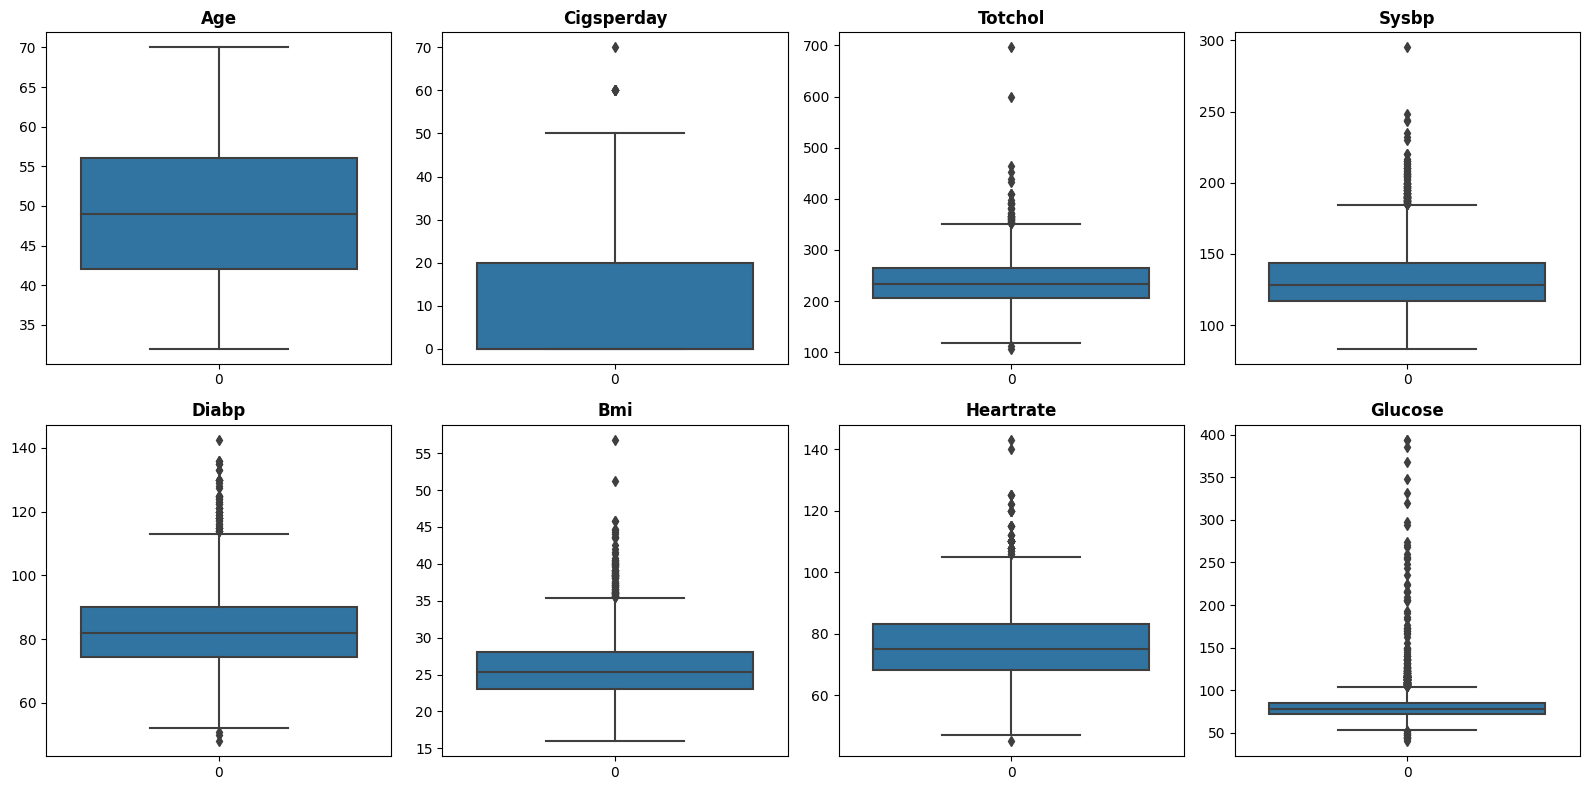

In [249]:
# Handling Outliers & Outlier treatments
fig, axes = plt.subplots(2, 4, figsize=(16,8))
axes = axes.flatten()
for ax, col in zip(axes, continous_variable):
    sns.boxplot(data_set[col], ax=ax)
    ax.set_title(col.title(), weight='bold')
plt.tight_layout()

In [250]:
def outliers_df(data_set, continuous_features):
    outlier_df = pd.DataFrame(columns=['feature', 'lower_limit', 'upper_limit',
                                       'IQR', 'total_outliers', 'percentage_outliers(%)'])
    for feature in continuous_features:
        values = data_set[feature]
        q1, q2, q3 = values.quantile([0.25, 0.5, 0.75])
        iqr = q3 - q1
        Lower_limit = q1 - 1.5 * iqr
        Upper_limit = q3 + 1.5 * iqr
        outliers = values[(values < Lower_limit) | (values > Upper_limit)]
        total_outliers = len(outliers)
        percentage_outliers = round(total_outliers * 100 / len(values), 2)
        outlier_df = outlier_df.append({'feature': feature,
                                        'lower_limit': Lower_limit,
                                        'upper_limit': Upper_limit,
                                        'IQR': iqr,
                                        'total_outliers': total_outliers, 
                                        'percentage_outliers(%)': percentage_outliers}, 
                                        ignore_index=True)
    return outlier_df.sort_values(by=['percentage_outliers(%)'], ascending=False)
     

In [251]:
outliers_df(data_set,continous_variable)

feature  lower_limit  upper_limit      IQR total_outliers  \
7     glucose     52.50000    104.50000  13.0000            214   
3       sysBP     76.50000    184.50000  27.0000            105   
5         BMI     15.57875     35.44875   4.9675             79   
6   heartRate     45.50000    105.50000  15.0000             64   
4       diaBP     51.25000    113.25000  15.5000             58   
2     totChol    119.00000    351.00000  58.0000             43   
1  cigsPerDay    -30.00000     50.00000  20.0000              9   
0         age     21.00000     77.00000  14.0000              0   

   percentage_outliers(%)  
7                    6.31  
3                    3.10  
5                    2.33  
6                    1.89  
4                    1.71  
2                    1.27  
1                    0.27  
0                    0.00

Due to the potential presence of critical patients among the outliers, moving all of them into the 25-75 interquartile range may not be a suitable approach for this dataset.

There are various methods available for treating outliers in a dataset, including Winsorization, Robust statistical methods, Removing outliers, and Transformation, which involves applying mathematical functions such as logarithmic, square root, or reciprocal to the data to normalize its distribution and mitigate the impact of outliers.

Regarding the third sentence, a possible rephrasing could be: "Although Removing outliers is one of the methods commonly used to deal with outliers, it can lead to a loss of information and a decrease in the sample size.

In light of the potential drawbacks of Removing outliers and the importance of preserving the sample size and information, we opt to employ transformation as a means of dealing with outliers in this dataset.



In [252]:
# applying transformation for treating outlier 
data_set[continous_variable] = np.log(data_set[continous_variable] +1 )

##### What all outlier treatment techniques have you used and why did you use those techniques?

I used LOG TRANSFORMATION method to remove outlier from the dataset.

I used this method because it is a statistical model and easy to implement yet it shows effective results.

This transformaton can also help to normalize the distribution of the data and make it more symmetrical.

### 3. Categorical Encoding

In [253]:
data_set['sex'] = pd.get_dummies(data_set['sex'], drop_first=True)
data_set['is_smoking'] = pd.get_dummies(data_set['is_smoking'], drop_first=True)

In [254]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   float64
 2   education        3390 non-null   float64
 3   sex              3390 non-null   uint8  
 4   is_smoking       3390 non-null   uint8  
 5   cigsPerDay       3390 non-null   float64
 6   BPMeds           3390 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3390 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3390 non-null   float64
 14  heartRate        3390 non-null   float64
 15  glucose          3390 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(10)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Since machine learning algorithms typically require input in a numerical format, it is necessary to convert categorical variables into numerical ones. Therefore, we are using one-hot encoding to transform the non-numeric variables 'sex' and 'is_smoking' into binary values (0 or 1).

The get_dummies() function from the pandas library is being utilized to generate dummy variables that represent the categories of each variable as individual binary columns.

True parameter is being employed to prevent multicollinearity, which can arise when two dummy variables are highly correlated, by eliminating the first column of each set of dummy variables.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [255]:
# Manipulate Features to minimize feature correlation and create new features

As we observed from the correlation heatmap, there is a strong correlation between Systolic Blood Pressure and Diastolic Pressure. Therefore, we are generating a new feature that will indicate whether an individual has a blood pressure problem or not.

After conducting a more in-depth analysis of heart-related problems, it was discovered that pulse pressure, defined as the difference between systolic and diastolic blood pressure, has a significant effect on CHD. Consequently, we can generate a new feature named PP (pulse pressure), which consolidates the systolic and diastolic blood pressure measurements into a solitary column.

In [256]:
# Adding pulse pressure as a column
data_set['pulsePressure'] = data_set['sysBP'] - data_set['diaBP']

#### 2. Feature Selection

In [257]:
# Select your features wisely to avoid overfitting

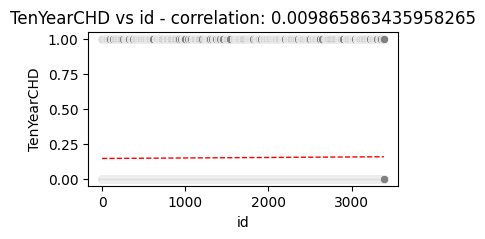

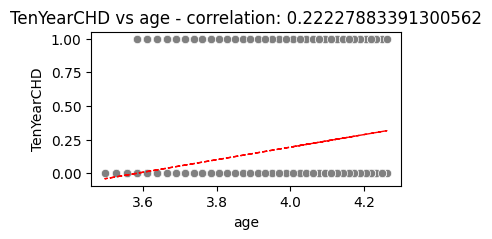

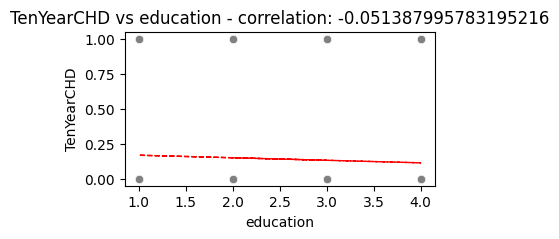

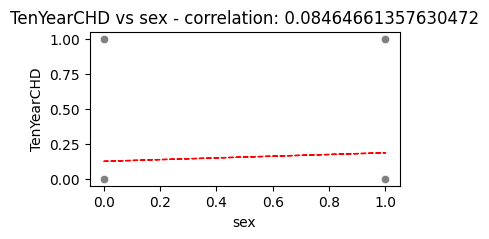

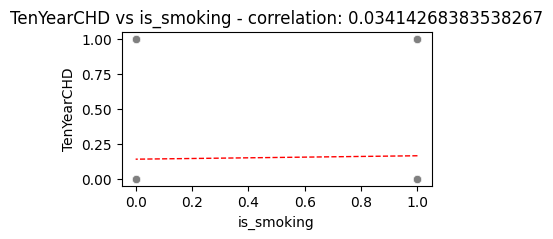

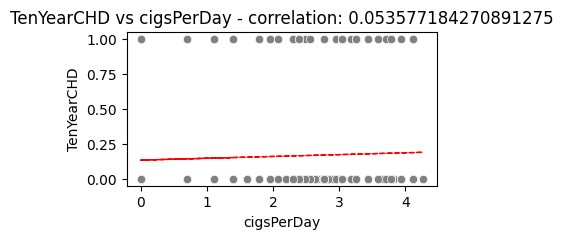

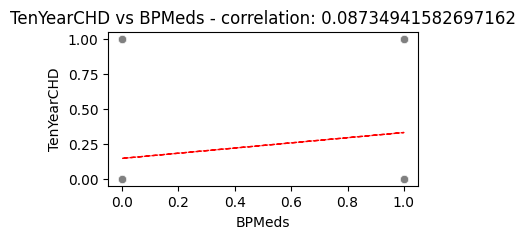

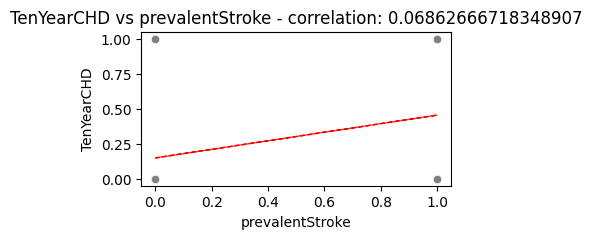

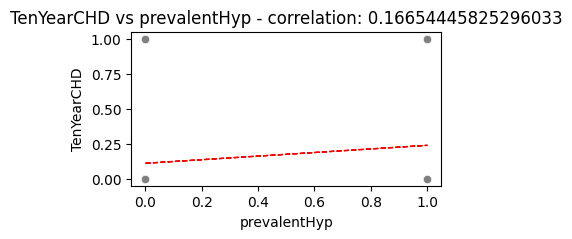

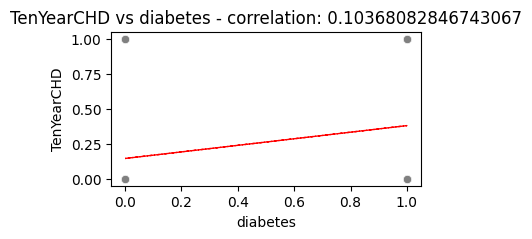

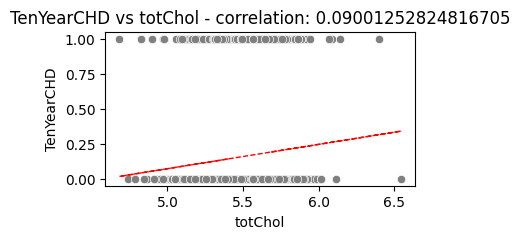

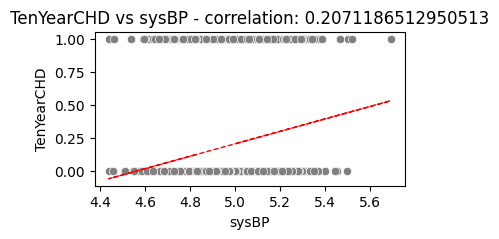

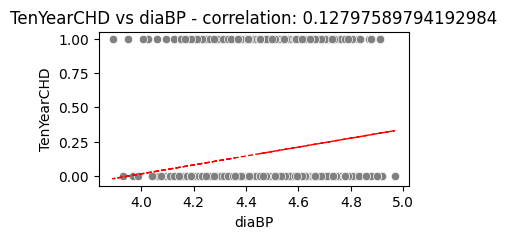

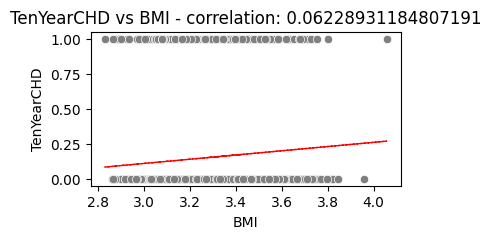

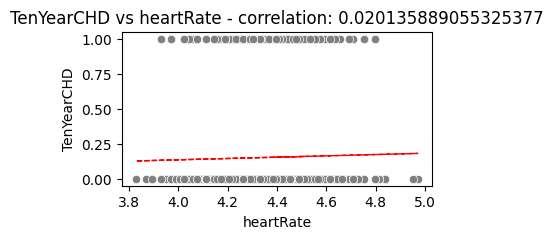

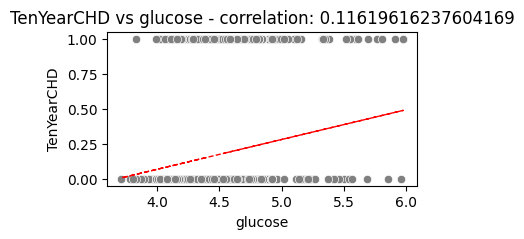

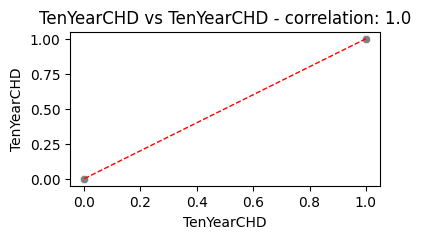

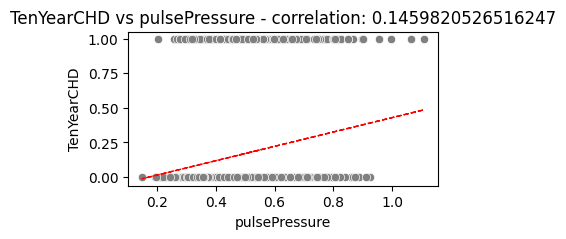

In [258]:
# Let's see how trip_duration and other features are related
for col in data_set.describe().columns.tolist():
    fig = plt.figure(figsize=(4, 2))
    ax = fig.gca()
    feature = data_set[col]
    label = data_set['TenYearCHD']
    correlation = feature.corr(label)
    sns.scatterplot(x=feature, y=label, color="gray")
    plt.xlabel(col)
    plt.ylabel('TenYearCHD')
    ax.set_title('TenYearCHD vs ' + col + ' - correlation: ' + str(correlation))
    z = np.polyfit(data_set[col], data_set['TenYearCHD'], 1)
    y_hat = np.poly1d(z)(data_set[col])
    plt.plot(data_set[col], y_hat, "r--", lw=1)
    plt.show()

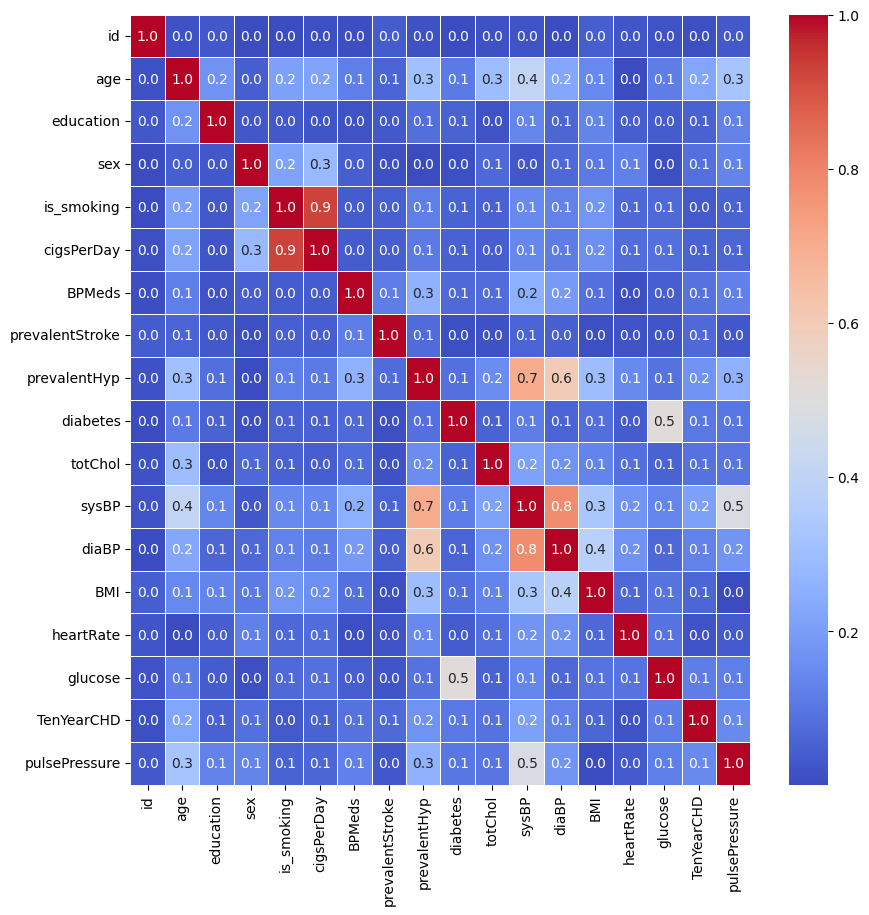

In [259]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(abs(round(data_set.corr(),3)), annot=True, linewidths=.5, fmt= '.1f',cmap='coolwarm',ax=ax)
plt.show()

##### What all feature selection methods have you used  and why?

One method of analysis is correlation, which involves measuring the relationship between each feature and the target variable. Features that exhibit a strong correlation with the target variable are usually regarded as effective predictors and are thus chosen for selection.

##### Which all features you found important and why?

1.Based on the heatmap analysis, we have observed a strong correlation between 'sysBP' and 'diaBP'. Since we have already computed a new feature called 'pulsePressure' from them, we are choosing to exclude both 'sysBP' and 'diaBP' from our analysis.

2.The 'id' feature has been deemed less relevant to our analysis, and hence, we are dropping it.

3.There is also a high correlation between the 'is_smoking' and 'cigsPerDay' columns, and therefore, one of them can be dropped if it is not contributing significantly to the target variable.

4.The 'is_smoking' column has been assigned a value of 1 when the number of cigarettes smoked per day is greater than zero. Hence, both 'is_smoking' and the number of cigarettes smoked convey the same information. Therefore, we are removing the 'is_smoking' column.

In [260]:
data_set.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'pulsePressure'],
      dtype='object')

In [261]:
# creating finl dataset
data = data_set[['age', 'education', 'sex','cigsPerDay', 'BPMeds',
               'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
               'BMI', 'heartRate', 'glucose', 'pulsePressure', 'TenYearCHD']]

<Axes: >

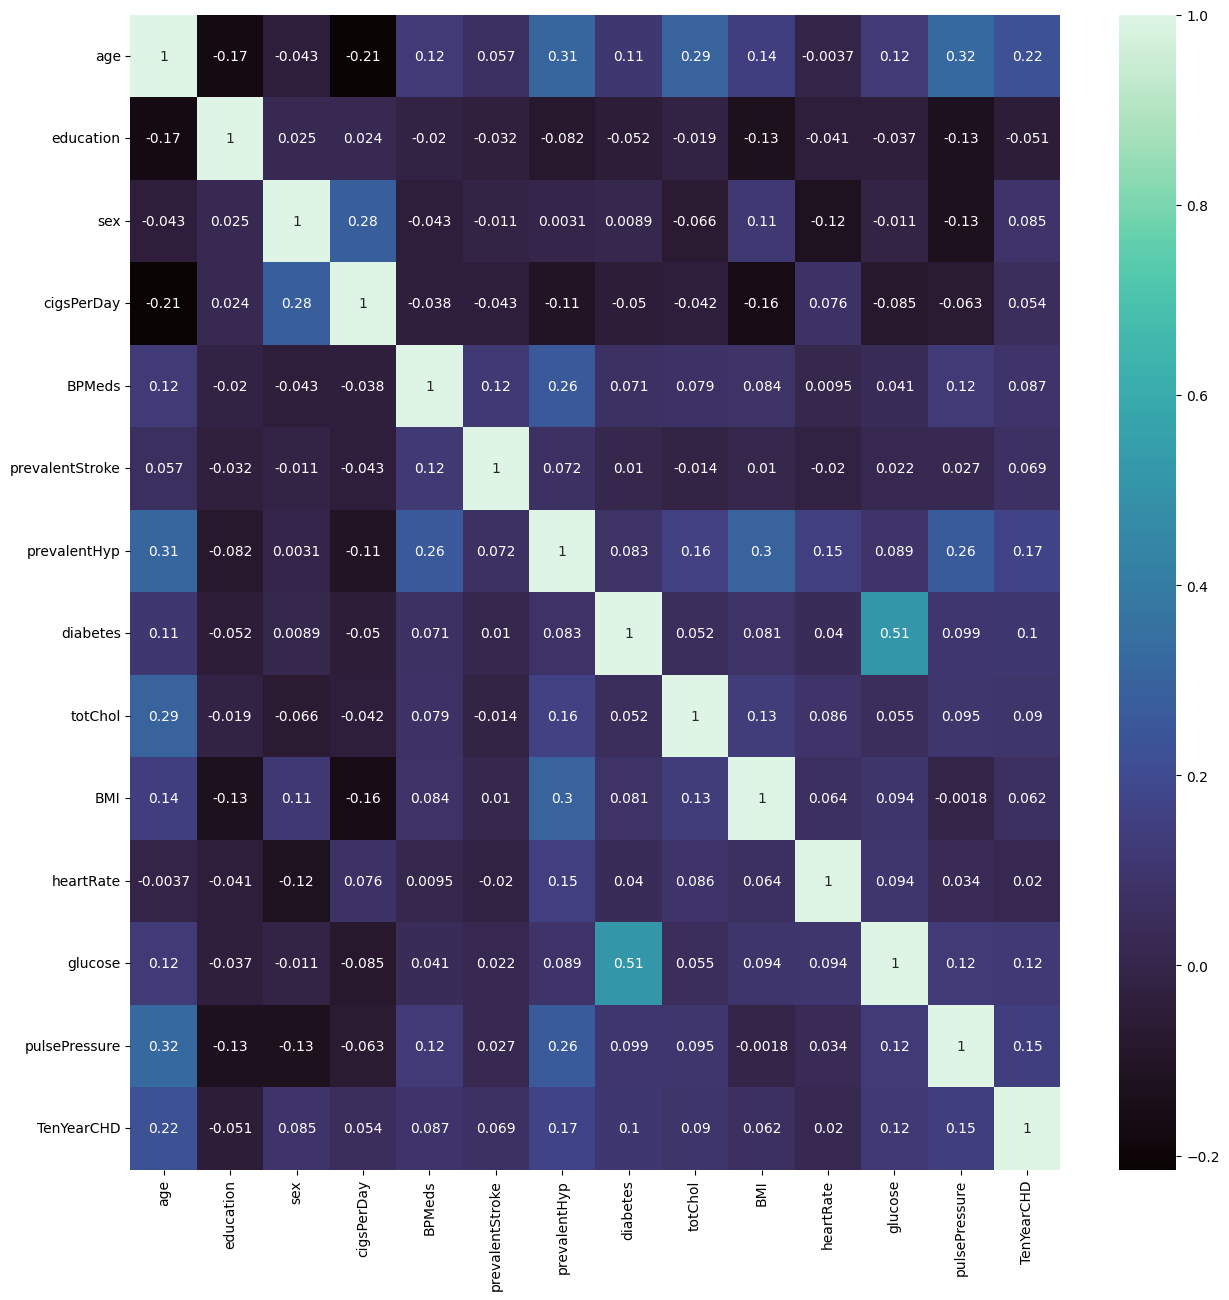

In [262]:
# check for heatmap if anything remains to avoid multicollinearity 
plt.figure(figsize=(15,15))
correlation = data.corr()
sns.heatmap((correlation), annot=True, cmap=sns.color_palette("mako", as_cmap=True))

### 5. Data Transformation

Data Transformation is not required because we already did the transformation when treating outliers.

But, we also updated our dataset, we added new feature as "pulse pressure".

So, we will check for it, if it needs a transformation.

Before Applying Transformation


Text(0.5, 1.0, 'Distribution of pulsePressure')

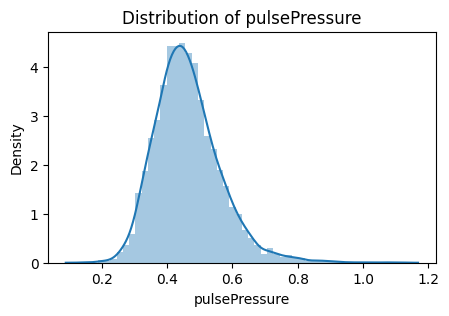

In [263]:
# Transform Your data# Checking the distribution of pulse pressure 
plt.figure(figsize=(5,3))
print("Before Applying Transformation")
sns.distplot(data_set['pulsePressure'])
plt.title('Distribution of pulsePressure')

((array([-3.53427553, -3.29263892, -3.15912694, ...,  3.15912694,
          3.29263892,  3.53427553]),
  array([0.14895586, 0.19166742, 0.19753098, ..., 0.99780759, 1.06471074,
         1.10897508])),
 (0.09881710532327304, 0.46253294418818647, 0.9803376025811831))

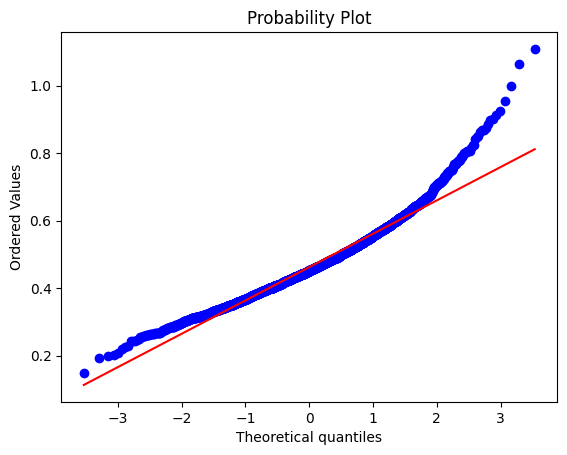

In [264]:
# If you want to check whether feature is guassian or normal distributed
# Q-Q plot
stats.probplot(data_set['pulsePressure'],dist='norm',plot=pylab)
     

In [265]:
# Creating 3 different copies to check the distribution of the variable
dataset1 = data.copy()
dataset2 = data.copy()
dataset3 = data.copy()

Here we use following Transformation Techniques:



Logarithmic Transformation

Reciprocal Trnasformation

Square Root Transformation

**Logarithmic Transformation**

After Applying Transformation


Text(0.5, 1.0, 'Distribution of pulsePressure')

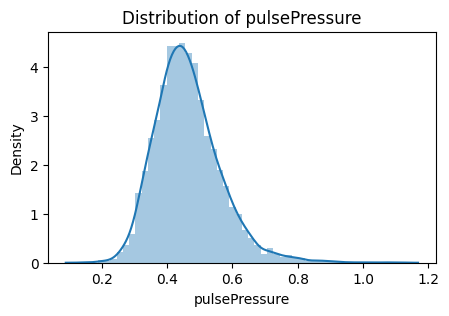

In [266]:
dataset1['pulsePressure']=np.log(dataset1['pulsePressure']+1)

# Checking the distribution of continous variable 
plt.figure(figsize=(5,3))
print("After Applying Transformation")
sns.distplot(data_set['pulsePressure'])
plt.title('Distribution of pulsePressure')  

((array([-3.53427553, -3.29263892, -3.15912694, ...,  3.15912694,
          3.29263892,  3.53427553]),
  array([0.14895586, 0.19166742, 0.19753098, ..., 0.99780759, 1.06471074,
         1.10897508])),
 (0.09881710532327304, 0.46253294418818647, 0.9803376025811831))

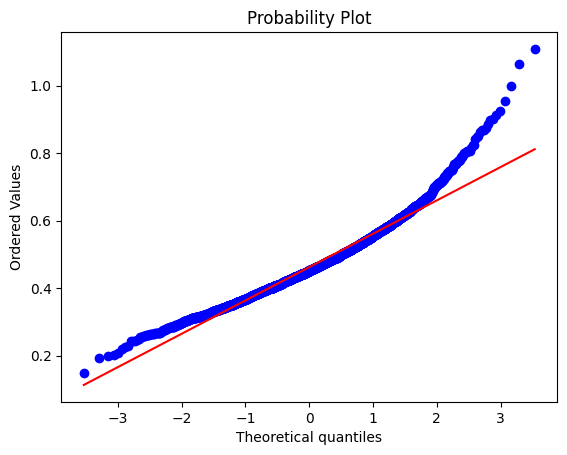

In [267]:
# Q-Q plot
stats.probplot(data_set['pulsePressure'],dist='norm',plot=pylab)

**Reciprocal Trnasformation**

After Applying Transformation


Text(0.5, 1.0, 'Distribution of pulsePressure')

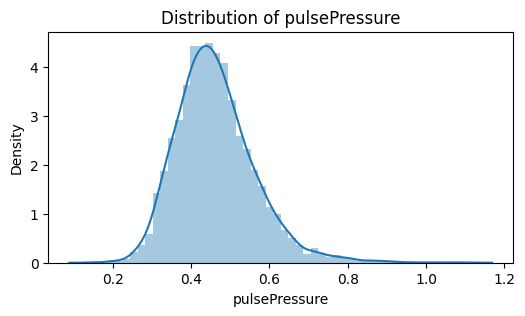

In [268]:
# Applying transformation on the considered column
dataset2['pulsePressure']=1/(dataset2['pulsePressure']+1)

# Checking the distribution of continous variable 
plt.figure(figsize=(6,3))
print("After Applying Transformation")
sns.distplot(data_set['pulsePressure'])
plt.title('Distribution of pulsePressure')

((array([-3.53427553, -3.29263892, -3.15912694, ...,  3.15912694,
          3.29263892,  3.53427553]),
  array([0.14895586, 0.19166742, 0.19753098, ..., 0.99780759, 1.06471074,
         1.10897508])),
 (0.09881710532327304, 0.46253294418818647, 0.9803376025811831))

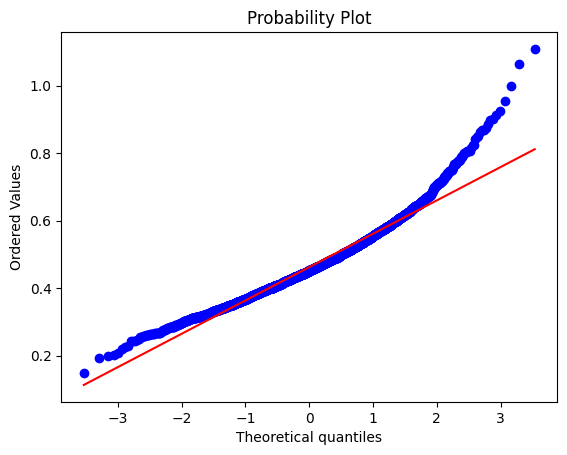

In [269]:
#Q-Q plot

stats.probplot(data_set['pulsePressure'],dist='norm',plot=pylab)

**Square Root Transformation**

After Applying Transformation


Text(0.5, 1.0, 'Distribution of pulsePressure')

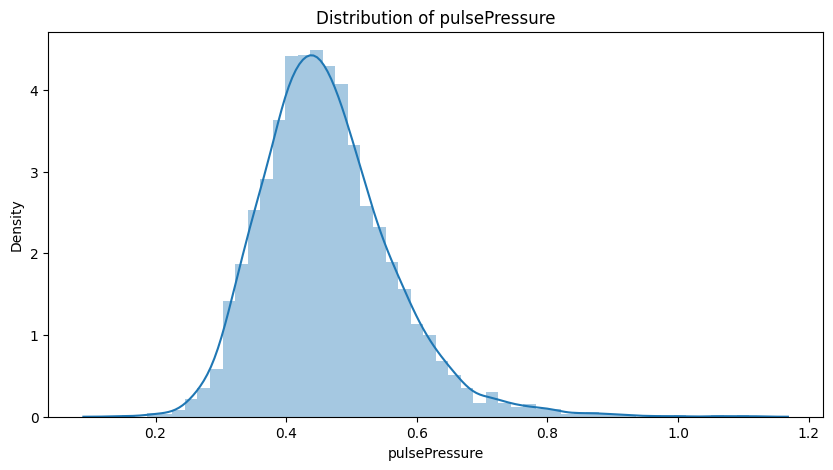

In [270]:
# Applying transformation on the considered column
dataset3['pulsePressure']=(dataset3['pulsePressure'])**(1/2)

# Checking the distribution of continous variable 
plt.figure(figsize=(10,5))
print("After Applying Transformation")
sns.distplot(data_set['pulsePressure'])
plt.title('Distribution of pulsePressure')  

((array([-3.53427553, -3.29263892, -3.15912694, ...,  3.15912694,
          3.29263892,  3.53427553]),
  array([0.14895586, 0.19166742, 0.19753098, ..., 0.99780759, 1.06471074,
         1.10897508])),
 (0.09881710532327304, 0.46253294418818647, 0.9803376025811831))

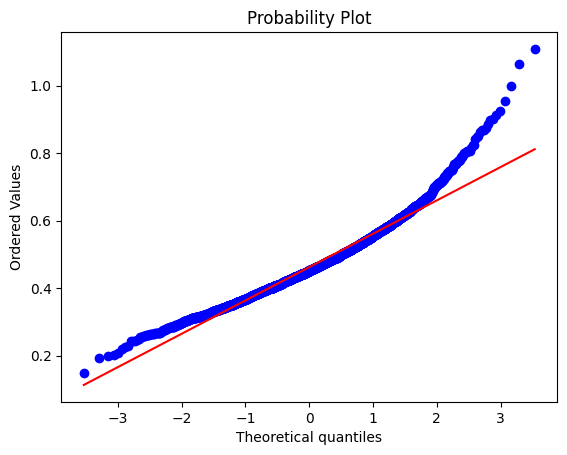

In [271]:
#Q-Q plot

stats.probplot(data_set['pulsePressure'],dist='norm',plot=pylab)

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes,we had already applied a logarithmic transformation to the data to eliminate outliers. However, since we generated the 'Pulse pressure' feature at a later stage, we had to determine the optimal transformation technique for this new feature as well. Our analysis revealed that the 'Pulse pressure' feature also required a logarithmic transformation.

**Applying Transform**

From the above plots it is clear that:

Feature "pulsePressure" needs logarithmic transformation.

In [272]:
# Applying transformation on the considered column
## Logarithmic transformation
data['pulsePressure']=np.log(data['pulsePressure']+1)

### 6. Data Scaling

In [273]:
# Scaling your data
X = data.drop('TenYearCHD' , axis = 1)
y = data[['TenYearCHD']]

In [274]:
# Scaling your data

# Creating object
std_regressor= StandardScaler()
     
# Fit and Transform
X = std_regressor.fit_transform(X)

##### Which method have you used to scale you data and why?

StandardScaler is a data scaling technique that standardizes the data by ensuring that the mean is 0 and the standard deviation is 1. This method is frequently utilized in machine learning because it maintains the shape of the initial distribution and is appropriate for most machine learning algorithms, particularly those that utilize distance-based metrics. StandardScaler is also advantageous when the data features have vastly different scales, as it can aid in making the features more comparable.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

NO it's not needed.

For the cardiovascular risk prediction dataset, conducting dimensionality reduction is not obligatory. This is because the number of features in the dataset is comparatively small when contrasted with the number of samples. As a result, the possibility of overfitting is low. Furthermore, since the dataset is not very large, the time taken for training machine learning models would not be a major concern.

### 8. Data Splitting

In [275]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [276]:
print(X.shape)
print(y.shape)
print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

(3390, 13)
(3390, 1)
The shape of X_train is: (2712, 13)
The shape of y_train is: (2712, 1)
The shape of X_test is: (678, 13)
The shape of y_test is: (678, 1)


##### What data splitting ratio have you used and why? 

To prevent overfitting and enhance model generalization performance, we partitioned the data such that 80% of it was used for training and the remaining 20% for testing. We employed the 'train_test_split' function from the scikit-learn library for this task, which is a popular technique for training and testing the model on distinct data samples.


### 9. Handling Imbalanced Dataset

In [277]:
print(data_set.TenYearCHD.value_counts())

0    2879
1     511
Name: TenYearCHD, dtype: int64


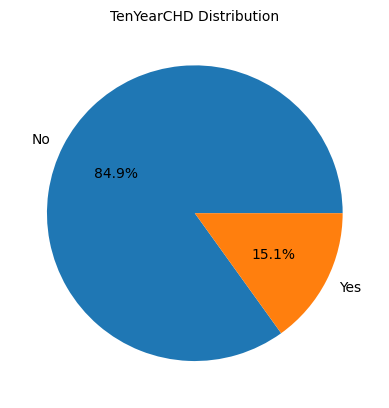

In [278]:
count = data['TenYearCHD'].value_counts()
labels =  ["No", "Yes"]
plt.title('TenYearCHD Distribution', fontsize=10)

# create pie chart 
plt.pie(count, labels=labels , autopct= "%1.1f%%",)
plt.show()

##### Do you think the dataset is imbalanced? Explain Why.

YES As shown in the pie chart, the target variable, which is the 10-year risk of coronary heart disease (CHD), is heavily imbalanced. Specifically, out of the total sample population, 84.9% or 2879 individuals are free from CHD risk, while only 15.1% or 511 individuals are at risk. Such a significant class imbalance in the data has the potential to lead to biased predictions, adversely affecting the performance of machine learning models. As a result, it is crucial to balance the data by employing appropriate techniques like undersampling or oversampling to enhance the accuracy and reliability of the models.

In [279]:
y.shape

(3390, 1)

In [280]:
# Handling Imbalanced Dataset (If needed)
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and apply SMOTE to the data
X_res, y_res = smote.fit_resample(X, y)

# Print the original and resampled dataset shapes
print('Original dataset shape:', data_set.shape)
print('Resampled dataset shape:', X_res.shape)

# Count the number of samples in each class in the resampled dataset
print('Class distribution in the resampled dataset:', y_res.value_counts())

Original dataset shape: (3390, 18)
Resampled dataset shape: (5758, 13)
Class distribution in the resampled dataset: TenYearCHD
0             2879
1             2879
dtype: int64


In [281]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 42)

In [282]:
print(f'The shape of x_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of x_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of x_train is: (4606, 13)
The shape of y_train is: (4606, 1)
The shape of x_test is: (1152, 13)
The shape of y_test is: (1152, 1)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

To address the imbalanced dataset, I leveraged the Synthetic Minority Over-sampling Technique (SMOTE). SMOTE is an oversampling technique that creates synthetic samples for the minority class by interpolating new instances between the existing ones. This method aids in balancing the class distribution and diminishing the bias towards the majority class in imbalanced datasets. As a result, the performance of machine learning models on imbalanced datasets may be improved.

## **7. ML Model Implementation**

In [283]:
# Creating class for checking accuracy of model
def checking_accuracy(y_train, y_test, train_preds, test_preds):
 
  from sklearn.metrics import accuracy_score, confusion_matrix

  # Get the accuracy scores
  train_accuracy = accuracy_score(y_train,train_preds)
  test_accuracy = accuracy_score(y_test,test_preds)
  print("The accuracy on train data is ", train_accuracy)
  print("The accuracy on test data is ", test_accuracy)

  from sklearn.metrics import precision_score, recall_score, f1_score

  # Get the precision scores
  train_precision = precision_score(y_train,train_preds)
  test_precision = precision_score(y_test,test_preds)
  print("The precision on train data is ", train_precision)
  print("The precision on test data is ", test_precision)

  # Get the recall scores
  train_recall = recall_score(y_train,train_preds)
  test_recall = recall_score(y_test,test_preds)
  print("The recall on train data is ", train_recall)
  print("The recall on test data is ", test_recall)

  # Get the f1 scores
  train_f1 = f1_score(y_train,train_preds)
  test_f1 = f1_score(y_test,test_preds)
  print("The f1 on train data is ", train_f1)
  print("The f1 on test data is ", test_f1)

  # Get the f1 scores
  train_roc_auc = roc_auc_score(y_train,train_preds)
  test_roc_auc = roc_auc_score(y_test,test_preds)
  print("The roc_auc on train data is ", train_roc_auc)
  print("The roc_auc on test data is ", test_roc_auc)

In [284]:
def plot_confusion_matrix(y_train, y_test, train_preds, test_preds):
  train_confusion_matrix = confusion_matrix(y_train, train_preds)
  test_confusion_matrix = confusion_matrix(y_test, test_preds)

  fig, axes = plt.subplots(1, 2, figsize=(8, 2))
  labels = ['0', '1']
  sns.heatmap(train_confusion_matrix, annot=True, cmap='Blues', ax=axes[0], fmt="d", xticklabels=labels, yticklabels=labels)
  axes[0].set_xlabel('Predicted labels')
  axes[0].set_ylabel('True labels')
  axes[0].set_title('Train Confusion Matrix')
  sns.heatmap(test_confusion_matrix, annot=True, cmap='Blues', ax=axes[1], fmt="d", xticklabels=labels, yticklabels=labels)
  axes[1].set_xlabel('Predicted labels')
  axes[1].set_ylabel('True labels')
  axes[1].set_title('Test Confusion Matrix')

  plt.show()

### ML Model 1 - Logistic Regression

In [285]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=True, max_iter=10000)

# Fit the Algorithm
clf.fit(X_train, y_train)

# Predict on the model
train_class_preds_lr = clf.predict(X_train)
test_class_preds_lr = clf.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [286]:
# Visualizing evaluation Metric Score chart
checking_accuracy(y_train,y_test,train_class_preds_lr,test_class_preds_lr)

The accuracy on train data is  0.6693443334780721
The accuracy on test data is  0.6796875
The precision on train data is  0.6641821946169773
The precision on test data is  0.6655290102389079
The recall on train data is  0.6925734024179621
The recall on test data is  0.6927175843694494
The f1 on train data is  0.6780807440287465
The f1 on test data is  0.6788511749347259
The roc_auc on train data is  0.6692124654011207
The roc_auc on test data is  0.6799750909962696


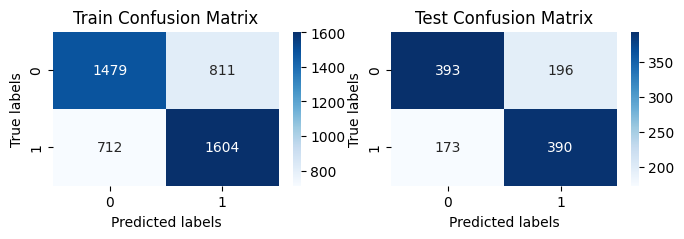

In [287]:
# for confusion matrix
plot_confusion_matrix(y_train,y_test,train_class_preds_lr,test_class_preds_lr)

#### 2. Cross- Validation & Hyperparameter Tuning

In [288]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lr = LogisticRegression()
# set up the parameter grid for hyperparameter tuning
para_grid = {'penalty': ['l1', 'l2'],
              'C': [0.1, 1.0, 10.0],
              'solver': ['liblinear', 'saga']}

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Fit the Algorithm
grid_search = GridSearchCV(lr, para_grid, cv=5)
grid_search.fit(X_train, y_train)

# Predict on the model
# get the best hyperparameters and print them
best_param = grid_search.best_params_
print('Best hyperparameters:', best_param)
# use the best hyperparameters to fit the model and make predictions
lr_best = LogisticRegression(**best_param)
# perform cross-validation on the model with the best hyperparameters
cv_scores = cross_val_score(lr_best, X_train, y_train, cv=5)
# fit the final model using all the training data and the best hyperparameters
lr_best.fit(X_train, y_train)
y_train_logistic_pred_cv = lr_best.predict(X_train)
y_test_logistic_pred_cv  = lr_best.predict(X_test)
y_score_logistic_pred_cv = lr_best.predict_proba(X_test)[:, 1]
     

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}


In [289]:
# Visualizing evaluation Metric Score chart
checking_accuracy(y_train,y_test,y_train_logistic_pred_cv, y_test_logistic_pred_cv)

The accuracy on train data is  0.6695614415979158
The accuracy on test data is  0.6796875
The precision on train data is  0.6643211920529801
The precision on test data is  0.6655290102389079
The recall on train data is  0.6930051813471503
The recall on test data is  0.6927175843694494
The f1 on train data is  0.6783601014370245
The f1 on test data is  0.6788511749347259
The roc_auc on train data is  0.6694283548657147
The roc_auc on test data is  0.6799750909962696


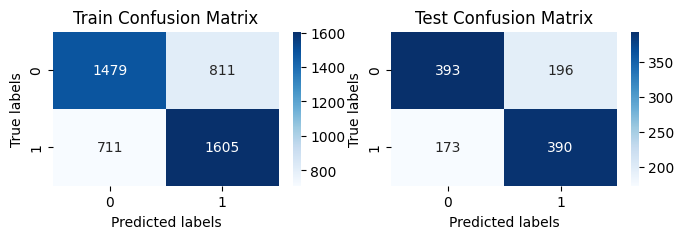

In [290]:
# for confusion matrix
plot_confusion_matrix(y_train,y_test,y_train_logistic_pred_cv, y_test_logistic_pred_cv)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is a powerful technique to fine-tune the hyperparameters of machine learning models. It exhaustively evaluates all possible combinations of hyperparameters and their corresponding values, enabling the selection of the best combination based on performance calculation. This results in increased accuracy and improved performance of the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We utilized GridSearchCV to search for the optimal hyperparameters, hoping to improve the performance of our machine learning model. Despite the exhaustive search of all possible hyperparameter combinations, our test results showed little improvement, with a test accuracy of only 67.97%, test precision and recall of 66.55% and 69.27%, respectively, and an area under the curve (ROC AUC) of only 0.68.

As a result, we have decided to explore other models such as Random Forest and XGBoost to enhance our model's accuracy and AUC score.

### ML Model 2 - Random Forest Classifier

In [291]:
from sklearn.ensemble import RandomForestClassifier
# ML Model - 2  Implementation
random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)

# Fit the Algorithm
random_forest.fit(X_train, y_train)

# Predict on the model
y_train_rf_pred = random_forest.predict(X_train)
y_test_rf_pred = random_forest.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The accuracy on train data is  0.9329135909683022
The accuracy on test data is  0.8315972222222222
The precision on train data is  0.910093992644054
The precision on test data is  0.8090452261306532
The recall on train data is  0.9615716753022453
The recall on test data is  0.8579040852575488
The f1 on train data is  0.9351249212681083
The f1 on test data is  0.8327586206896551
The roc_auc on train data is  0.9327509031533061
The roc_auc on test data is  0.8321778490803873


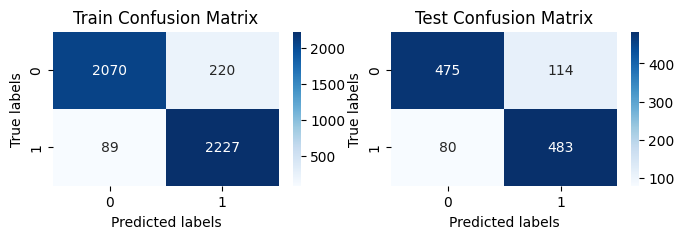

In [292]:
# Visualizing evaluation Metric Score chart
checking_accuracy(y_train, y_test,y_train_rf_pred,y_test_rf_pred)
plot_confusion_matrix(y_train, y_test,y_train_rf_pred,y_test_rf_pred)

#### 2. Cross- Validation & Hyperparameter Tuning

In [293]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
random_forest = RandomForestClassifier()
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [5, 10, 15, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}
# Fit the Algorithm
grid_search = GridSearchCV(random_forest, param_grid, cv=5)
grid_search.fit(X_train, y_train)
# Predict on the model
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)
# use the best hyperparameters to fit the model to the training data
random_forest_best = RandomForestClassifier(**best_params)
random_forest_best.fit(X_train, y_train)
# Predict on the model
y_train_rf_pred_gs = random_forest_best.predict(X_train)
y_test_rf_pred_gs  = random_forest_best.predict(X_test)
y_score_rf_pred_gs = random_forest_best.predict_proba(X_test)[:, 1]

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


The accuracy on train data is  1.0
The accuracy on test data is  0.890625
The precision on train data is  1.0
The precision on test data is  0.878682842287695
The recall on train data is  1.0
The recall on test data is  0.9005328596802842
The f1 on train data is  1.0
The f1 on test data is  0.8894736842105264
The roc_auc on train data is  1.0
The roc_auc on test data is  0.8908436794156939


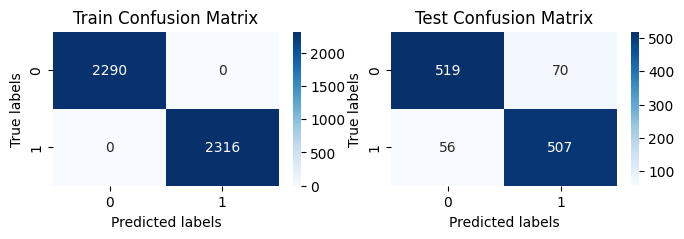

In [294]:
checking_accuracy(y_train, y_test,y_train_rf_pred_gs,y_test_rf_pred_gs)
plot_confusion_matrix(y_train, y_test,y_train_rf_pred_gs,y_test_rf_pred_gs)

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is a potent technique that can be employed to optimize the hyperparameters of machine learning models. This method involves systematically exploring all the feasible hyperparameter combinations and their respective values to determine the optimal configuration that maximizes the model's performance, thus resulting in more precise outcomes.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Through the utilization of GridSearchCV, we were able to enhance the performance of our machine learning model by identifying the most appropriate hyperparameters. GridSearchCV systematically evaluates all the possible combinations of hyperparameters and determines the optimal values to maximize the model's performance, leading to the most precise outcomes.

Following the hyperparameter tuning, we obtained the optimal parameter configuration, which included 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200. Although the training accuracy was 100%, we were able to improve the test accuracy from 83.07% to 88.89%.

Moreover, we were able to enhance the ROC AUC score from 0.8311 to 0.8890.Through the utilization of GridSearchCV, we were able to enhance the performance of our machine learning model by identifying the most appropriate hyperparameters. GridSearchCV systematically evaluates all the possible combinations of hyperparameters and determines the optimal values to maximize the model's performance, leading to the most precise outcomes.

Following the hyperparameter tuning, we obtained the optimal parameter configuration, which included 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200. Although the training accuracy was 100%, we were able to improve the test accuracy from 83.07% to 88.89%.

Moreover, we were able to enhance the ROC AUC score from 0.8311 to 0.8890.Through the utilization of GridSearchCV, we were able to enhance the performance of our machine learning model by identifying the most appropriate hyperparameters. GridSearchCV systematically evaluates all the possible combinations of hyperparameters and determines the optimal values to maximize the model's performance, leading to the most precise outcomes.

Following the hyperparameter tuning, we obtained the optimal parameter configuration, which included 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200. Although the training accuracy was 100%, we were able to improve the test accuracy from 83.07% to 88.89%.

Moreover, we were able to enhance the ROC AUC score from 0.8311 to 0.8890.Through the utilization of GridSearchCV, we were able to enhance the performance of our machine learning model by identifying the most appropriate hyperparameters. GridSearchCV systematically evaluates all the possible combinations of hyperparameters and determines the optimal values to maximize the model's performance, leading to the most precise outcomes.

Following the hyperparameter tuning, we obtained the optimal parameter configuration, which included 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200. Although the training accuracy was 100%, we were able to improve the test accuracy from 83.07% to 88.89%.

Moreover, we were able to enhance the ROC AUC score from 0.8311 to 0.8890.Through the utilization of GridSearchCV, we were able to enhance the performance of our machine learning model by identifying the most appropriate hyperparameters. GridSearchCV systematically evaluates all the possible combinations of hyperparameters and determines the optimal values to maximize the model's performance, leading to the most precise outcomes.

Following the hyperparameter tuning, we obtained the optimal parameter configuration, which included 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200. Although the training accuracy was 100%, we were able to improve the test accuracy from 83.07% to 88.89%.

Moreover, we were able to enhance the ROC AUC score from 0.8311 to 0.8890.Through the utilization of GridSearchCV, we were able to enhance the performance of our machine learning model by identifying the most appropriate hyperparameters. GridSearchCV systematically evaluates all the possible combinations of hyperparameters and determines the optimal values to maximize the model's performance, leading to the most precise outcomes.

Following the hyperparameter tuning, we obtained the optimal parameter configuration, which included 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200. Although the training accuracy was 100%, we were able to improve the test accuracy from 83.07% to 88.89%.

Moreover, we were able to enhance the ROC AUC score from 0.8311 to 0.8890.Through the utilization of GridSearchCV, we were able to enhance the performance of our machine learning model by identifying the most appropriate hyperparameters. GridSearchCV systematically evaluates all the possible combinations of hyperparameters and determines the optimal values to maximize the model's performance, leading to the most precise outcomes.

Following the hyperparameter tuning, we obtained the optimal parameter configuration, which included 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200. Although the training accuracy was 100%, we were able to improve the test accuracy from 83.07% to 88.89%.

Moreover, we were able to enhance the ROC AUC score from 0.8311 to 0.8890.Through the utilization of GridSearchCV, we were able to enhance the performance of our machine learning model by identifying the most appropriate hyperparameters. GridSearchCV systematically evaluates all the possible combinations of hyperparameters and determines the optimal values to maximize the model's performance, leading to the most precise outcomes.

Following the hyperparameter tuning, we obtained the optimal parameter configuration, which included 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200. Although the training accuracy was 100%, we were able to improve the test accuracy from 83.07% to 88.89%.

Moreover, we were able to enhance the ROC AUC score from 0.8311 to 0.8890.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Assessing the performance of an ML model is essential to determine the accuracy of its predictions. To evaluate the model's effectiveness, we used various metrics, such as Accuracy, Precision, Recall, and ROC AUC score, to determine how closely the predicted values aligned with the actual values. Our findings revealed that the model accurately predicted the Ten Year CHD with an accuracy rate of around 88.89%. This level of accuracy is particularly noteworthy as the TenYearCHD variable directly influences business outcomes.

### ML Model 3 - XGBoost Classifier

In [295]:
from xgboost import XGBClassifier
# ML Model - 3 Implementation
xgb = XGBClassifier()
# Fit the Algorithm
xgb.fit(X_train, y_train)
# Predict on the model
y_train_xgb_pred = xgb.predict(X_train)
y_test_xgb_pred = xgb.predict(X_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The accuracy on train data is  0.9926183239253148
The accuracy on test data is  0.8967013888888888
The precision on train data is  0.9995621716287215
The precision on test data is  0.9172932330827067
The recall on train data is  0.9857512953367875
The recall on test data is  0.866785079928952
The f1 on train data is  0.9926086956521739
The f1 on test data is  0.8913242009132419
The roc_auc on train data is  0.99265730705704
The roc_auc on test data is  0.896041096840537


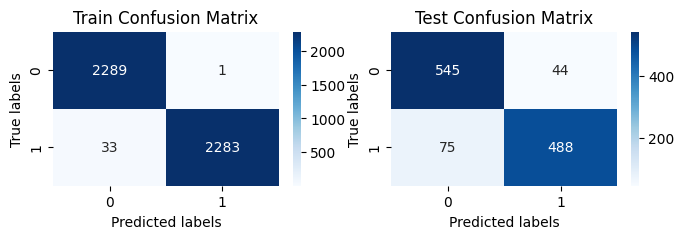

In [296]:
# Visualizing evaluation Metric Score chart
checking_accuracy(y_train, y_test,y_train_xgb_pred, y_test_xgb_pred)
plot_confusion_matrix(y_train, y_test, y_train_xgb_pred, y_test_xgb_pred)

#### 2. Cross- Validation & Hyperparameter Tuning

In [297]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# set up the parameter grid for hyperparameter tuning
param_grid = {'max_depth': [3, 5, 7],
              'learning_rate': [0.01, 0.1, 0.3],
              'n_estimators': [50, 100, 200]}
# Fit the Algorithm
grid_search = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
# print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)
# Predict on the model
best_estimator = grid_search.best_estimator_
y_train_xgb_pred_gs = best_estimator.predict(X_train)
y_test_xgb_pred_gs  = best_estimator.predict(X_test)
y_score_xgb_pred_gs = best_estimator.predict_proba(X_test)[:, 1]

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


The accuracy on train data is  0.9906643508467217
The accuracy on test data is  0.8967013888888888
The precision on train data is  0.9995604395604396
The precision on test data is  0.926923076923077
The recall on train data is  0.9818652849740933
The recall on test data is  0.8561278863232682
The f1 on train data is  0.9906338488346765
The f1 on test data is  0.8901200369344414
The roc_auc on train data is  0.9907143018756929
The roc_auc on test data is  0.8958058786455051


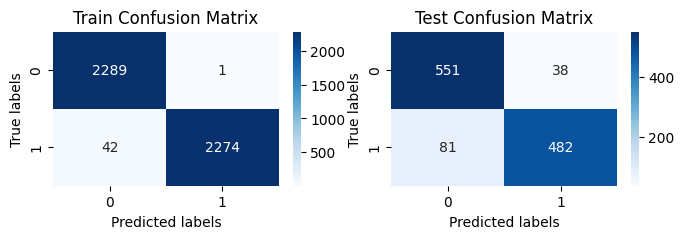

In [298]:
checking_accuracy(y_train, y_test,y_train_xgb_pred_gs, y_test_xgb_pred_gs)
plot_confusion_matrix(y_train, y_test, y_train_xgb_pred_gs, y_test_xgb_pred_gs)

##### Which hyperparameter optimization technique have you used and why?

To optimize the hyperparameters of our machine learning model, we utilized the powerful technique of GridSearchCV. This method is highly effective as it systematically evaluates all possible combinations of hyperparameters and their corresponding values, and selects the optimal combination based on performance metrics. Employing this approach leads to improved model performance and more precise outcomes.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We utilized the exhaustive evaluation of all possible hyperparameter combinations offered by GridSearchCV to optimize our machine learning model's performance. This approach enabled us to identify the optimal hyperparameter values, leading to more precise outcomes and improved model performance.

Following the hyperparameter tuning process, we determined the best parameters as 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200. As a result, the accuracy of our model significantly improved from 82.55% to 89.67%. Furthermore, we observed notable improvements in the Precision and Recall metrics, which increased to 92.69% and 85.61%, respectively. Additionally, the ROC AUC score improved to 0.8958, which is considered good.

### ML Model 4 - K-Nearest Neighbors (KNN)

In [299]:
from sklearn.neighbors import KNeighborsClassifier
# ML Model - 4 Implementation
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the Algorithm
knn.fit(X_train, y_train)

# Predict on the model
y_train_knn_pred = knn.predict(X_train)
y_test_knn_pred = knn.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The accuracy on train data is  0.8630047763786366
The accuracy on test data is  0.7855902777777778
The precision on train data is  0.7902170168790906
The precision on test data is  0.7123655913978495
The recall on train data is  0.9905008635578584
The recall on test data is  0.9413854351687388
The f1 on train data is  0.8790956121862425
The f1 on test data is  0.811017597551645
The roc_auc on train data is  0.8622809994645187
The roc_auc on test data is  0.7890288805724848


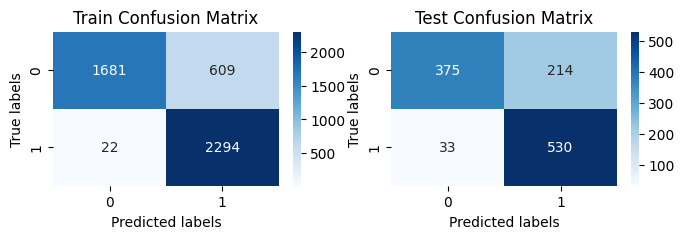

In [300]:
# Visualizing evaluation Metric Score chart
checking_accuracy(y_train, y_test, y_train_knn_pred, y_test_knn_pred)
plot_confusion_matrix(y_train, y_test, y_train_knn_pred, y_test_knn_pred)

#### 2. Cross- Validation & Hyperparameter Tuning

In [301]:
# ML Model - 4  Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# set up the parameter grid for hyperparameter tuning
param_grid = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance']}
# Fit the Algorithm
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)
# get the best hyperparameters and print them
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)
# train the classifier with the best hyperparameters on the full training set
knn_best = KNeighborsClassifier(**best_params)
knn_best.fit(X_train, y_train)
# Predict on the model
y_test_knn_pred_gs  = knn_best.predict(X_test)
y_train_knn_pred_gs = knn_best.predict(X_train)
y_score_knn_pred_gs = knn_best.predict_proba(X_test)[:, 1]

Best hyperparameters: {'n_neighbors': 3, 'weights': 'distance'}


The accuracy on train data is  1.0
The accuracy on test data is  0.8211805555555556
The precision on train data is  1.0
The precision on test data is  0.7402422611036339
The recall on train data is  1.0
The recall on test data is  0.9769094138543517
The f1 on train data is  1.0
The f1 on test data is  0.8422664624808576
The roc_auc on train data is  1.0
The roc_auc on test data is  0.8246176950426258


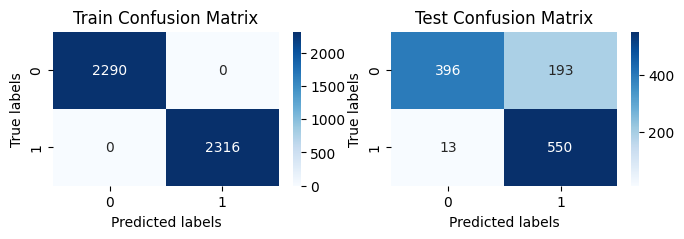

In [302]:
# Visualizing evaluation Metric Score chart
checking_accuracy(y_train, y_test, y_train_knn_pred_gs, y_test_knn_pred_gs)
plot_confusion_matrix(y_train, y_test, y_train_knn_pred_gs, y_test_knn_pred_gs)

#### Which hyperparameter optimization technique have you used and why?

To enhance the performance of our machine learning model, we employed GridSearchCV to optimize the hyperparameters. This technique exhaustively evaluates all feasible hyperparameter combinations and their respective values, selecting the optimal configuration to maximize model performance. By employing this approach, we achieved more precise results and significantly improved the model's performance.

#### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Through the utilization of GridSearchCV, we optimized our machine learning model by exhaustively searching for the best hyperparameters among all possible combinations. This rigorous process enabled us to select the optimal values, resulting in a significant improvement in model performance.

In the KNN model, we observed an increase in accuracy from 78.56% to 82.12%, a Precision of 74.02%, Recall of 97.69%, and ROC AUC score of 0.8246, which is higher after hyperparameter tuning. However, the ROC AUC score is lower than the previous model.

### ML Model 5 - Support Vector Machine Classifier (SVC)

In [303]:
from sklearn.svm import SVC
# ML Model - 5 Implementation
svc = SVC(kernel='rbf', C=1, gamma='scale')

# Fit the Algorithm
svc.fit(X_train, y_train)

# Predict on the model
y_train_svc_pred = svc.predict(X_train)
y_test_svc_pred = svc.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


The accuracy on train data is  0.7546678245766392
The accuracy on test data is  0.7013888888888888
The precision on train data is  0.75
The precision on test data is  0.686541737649063
The recall on train data is  0.7681347150259067
The recall on test data is  0.7158081705150977
The f1 on train data is  0.7589590443686006
The f1 on test data is  0.7008695652173913
The roc_auc on train data is  0.7545913749802023
The roc_auc on test data is  0.7017071412847135


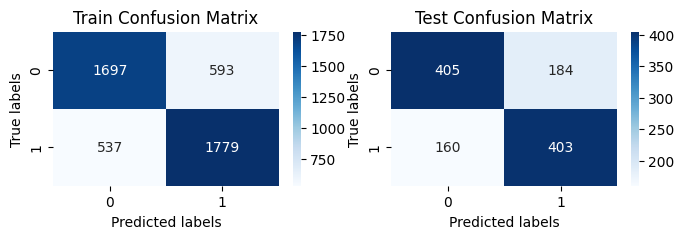

In [304]:
checking_accuracy(y_train, y_test, y_train_svc_pred, y_test_svc_pred)
plot_confusion_matrix(y_train, y_test, y_train_svc_pred, y_test_svc_pred)

#### 2. Cross- Validation & Hyperparameter Tuning

In [305]:
# ML Model - 5  Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
svc = SVC(probability=True)
# set up the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf'],
              'gamma': ['scale', 'auto']}
# perform a grid search with 5-fold cross-validation to find the best hyperparameters
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_train, y_train)
# get the best hyperparameters and print them
best_params = grid_search.best_params_
print('Best hyperparameters:', best_params)
# train the classifier with the best hyperparameters on the full training set
svc_best = SVC(**best_params, probability=True)
svc_best.fit(X_train, y_train)
# Predict on the model
y_test_svc_pred_gs = svc_best.predict(X_test)
y_train_svc_pred_gs = svc_best.predict(X_train)
y_score_svc_pred_gs = svc_best.predict_proba(X_test)[:, 1]

Best hyperparameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


The accuracy on train data is  0.8514980460269214
The accuracy on test data is  0.7673611111111112
The precision on train data is  0.8264
The precision on test data is  0.7330173775671406
The recall on train data is  0.8920552677029361
The recall on test data is  0.8241563055062167
The f1 on train data is  0.8579734219269104
The f1 on test data is  0.7759197324414715
The roc_auc on train data is  0.8512678085239571
The roc_auc on test data is  0.7686146552997978


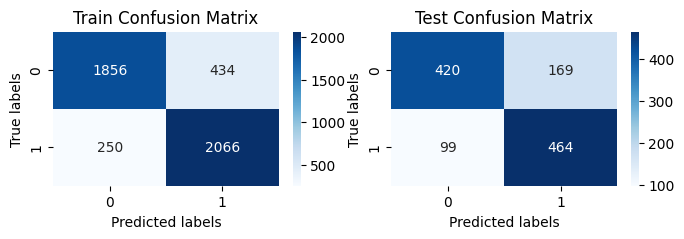

In [306]:
checking_accuracy(y_train, y_test, y_train_svc_pred_gs, y_test_svc_pred_gs)
plot_confusion_matrix(y_train, y_test, y_train_svc_pred_gs, y_test_svc_pred_gs)

#### Which hyperparameter optimization technique have you used and why?

By utilizing GridSearchCV, we optimized the hyperparameters of our machine learning model to fine-tune it for optimal performance. This technique evaluates all feasible hyperparameter combinations and their respective values to identify the best configuration for maximizing model performance, resulting in more precise outcomes and improved model performance.



####Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

To optimize the performance of our machine learning model, we utilized GridSearchCV to search for the best hyperparameters. This technique evaluates all possible combinations of hyperparameters and selects the optimal values to enhance model performance, leading to more precise outcomes.

Upon performing hyperparameter tuning, we observed a modest improvement in our model's performance. The accuracy improved from 70.14% to 76.74%, precision increased from 68.65% to 73.30%, and recall rose from 71.58% to 82.42%. Additionally, we achieved an AUC ROC of 76.86%.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Here Predicting TenYearCHD considered as classification problem, where the goal is to predict a outcome variable (TenYearChd) based on one or more predictor variables.

**Accuracy**: Accuracy is a commonly used metric to evaluate the performance of a classification model. It measures the percentage of correctly classified instances among all instances. A higher accuracy score indicates a better performance of the model in predicting the correct class for each instance.

**Precision**: Precision is a metric that measures the proportion of true positive predictions among all positive predictions made by the model. It is calculated by dividing the number of true positives by the sum of true positives and false positives. A higher precision score indicates that the model has a lower rate of false positives, which is important in applications where false positives have a high cost.

**Recall**: Recall, also known as sensitivity or true positive rate, is a metric that measures the proportion of true positive predictions among all instances that actually belong to the positive class. It is calculated by dividing the number of true positives by the sum of true positives and false negatives. A higher recall score indicates that the model has a lower rate of false negatives, which is important in applications where false negatives have a high cost.

**AUC ROC**: The Area Under the Receiver Operating Characteristic Curve (AUC ROC) is a metric used to evaluate the performance of binary classification models. It measures the model's ability to distinguish between positive and negative classes at different probability thresholds. The AUC ROC score ranges between 0 and 1, with a score of 0.5 indicating a random model and a score of 1 indicating a perfect model. A higher AUC ROC score indicates a better performance of the model in distinguishing between positive and negative classes.


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

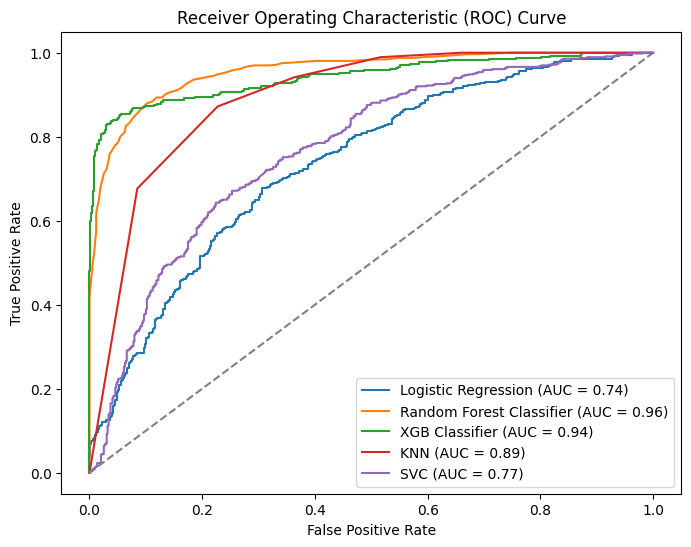

In [307]:
# define the classifiers
classifiers = [ ("Logistic Regression", LogisticRegression()),
                ("Random Forest Classifier", RandomForestClassifier()),
                ("XGB Classifier", XGBClassifier()),
                ("KNN", KNeighborsClassifier()),
                ("SVC", SVC(probability=True)),]

# iterate through classifiers and plot ROC curves
plt.figure(figsize=(8, 6))
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_score = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### After cross validation and hyperparameter tuning

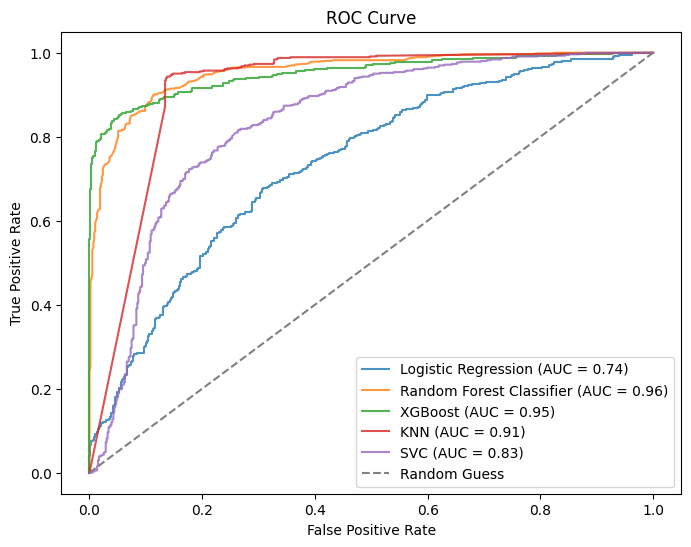

In [308]:
# Storing metrics in order to make dataframe
# (after cross validation and hyperparameter tuning)
Model = ["Logistic Regression", "Random Forest Classifier", "XGBoost", "KNN", "SVC"]
Y_SCORE = [y_score_logistic_pred_cv, y_score_rf_pred_gs, y_score_xgb_pred_gs, 
           y_score_knn_pred_gs, y_score_svc_pred_gs]

# Create dataframe from the lists
data = {'MODEL': Model, 'Y_SCORE': Y_SCORE}
Metric_df = pd.DataFrame(data)

# plot the ROC curves for each model
plt.figure(figsize=(8, 6))
for i, row in Metric_df.iterrows():
    fpr, tpr, _ = roc_curve(y_test, row['Y_SCORE'])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{row['MODEL']} (AUC = {roc_auc:.2f})", alpha=0.8)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [309]:
# Storing metrics in order to make dataframe of metrics 
# (after cross validation and hyperparameter tuning)
Model          = ["Logistic Regression", "Random Forest Classifier", "XGBoost", "KNN", "SVC"]
Test_Accuracy  = [0.6797,0.8889,0.8967,0.8212,0.7674]
Test_Precision = [0.6655,0.8796,0.9269,0.7402,0.7330]
Test_Recall    = [0.6927,0.8952,0.8561,0.9769,0.8242]
Test_f1_score  = [0.6788,0.8792,0.8901,0.8422,0.7759]
Test_ROC_AUC   = [0.6800,0.8890,0.8958,0.8246,0.7686]
# Create dataframe from the lists
data = {
        'Test_Accuracy'  : Test_Accuracy,
        'Test_Precision' : Test_Precision,
        'Test_Recall'    : Test_Recall,
        'Test_f1_score'  : Test_f1_score,
        'Test_ROC_AUC'   : Test_ROC_AUC}
Metric_df = pd.DataFrame(data,index = Model)

# Printing dataframe
Metric_df   

Test_Accuracy  Test_Precision  Test_Recall  \
Logistic Regression              0.6797          0.6655       0.6927   
Random Forest Classifier         0.8889          0.8796       0.8952   
XGBoost                          0.8967          0.9269       0.8561   
KNN                              0.8212          0.7402       0.9769   
SVC                              0.7674          0.7330       0.8242   

                          Test_f1_score  Test_ROC_AUC  
Logistic Regression              0.6788        0.6800  
Random Forest Classifier         0.8792        0.8890  
XGBoost                          0.8901        0.8958  
KNN                              0.8422        0.8246  
SVC                              0.7759        0.7686

Text(0.5, 1.0, 'Comparison of Metrics for Different Models')

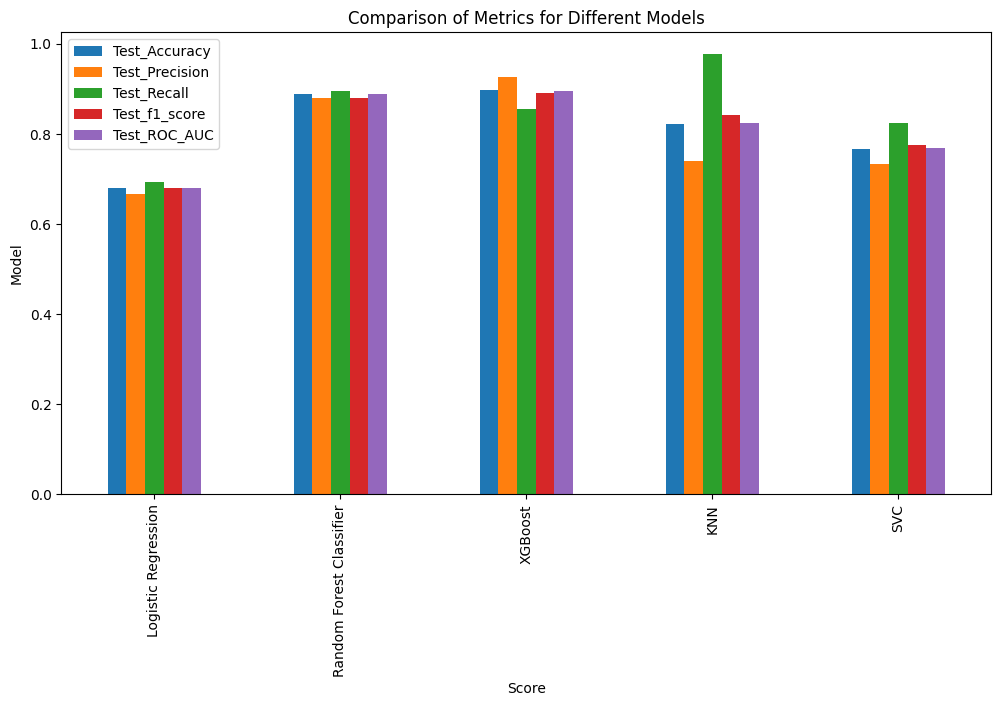

In [310]:
# Create a horizontal bar plot

ax = Metric_df.plot(kind='bar', figsize=(12, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
ax.set_xlabel('Score')
ax.set_ylabel('Model')
ax.set_title('Comparison of Metrics for Different Models')

After evaluating several models on the cardiovascular risk prediction project, it appears that the Random Forest Classifier and XGBoost models outperform the other models in terms of accuracy, precision, recall, and ROC AUC score. The Random Forest Classifier has an accuracy score of 0.8889, while the XGBoost model has an accuracy score of 0.8967, indicating that both models are suitable for use in real-time prediction systems. Additionally, the precision and recall scores of these models are high, indicating that they are good at correctly predicting positive and negative cases.

However, the XGBoost model has slightly higher test accuracy, precision, and ROC AUC scores than the Random Forest Classifier, suggesting that it may be a better choice for predicting cardiovascular risk. Therefore, based on the evaluation results, the XGBoost model appears to be the better choice for predicting cardiovascular risk in this project, and we are selecting it as the best fit classification model.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

#### Conclusion From EDA

1.Age plays a significant role in determining the risk of CHD.

2.Men have a higher likelihood of developing CHD compared to women.

3.Smoking is a well-known risk factor for CHD, and the intensity of smoking further increases the risk.

4.Patients with high blood pressure, stroke, and diabetes are at an elevated risk of developing CHD.

5.Patients who have had a prevalent stroke or prevalent hypertension have a higher likelihood of being at risk for CHD.

6.Patients with diabetes have an increased risk of CHD.

7.Total cholesterol levels tend to be slightly higher in patients who are at risk for CHD.

8.There exists a positive association between certain variables such as age and systolic blood pressure, as well as between BMI and glucose levels, with the risk of CHD.





#### Conclusion From Model Implementation

1.The Random Forest Classifier and XGBoost models outperformed the other four models tested in terms of accuracy, precision, and recall scores.

2.Although the KNN model had a relatively high recall score, its accuracy and precision scores were lower compared to those of the Random Forest Classifier and XGBoost models.

3.The SVC model had lower accuracy and ROC AUC scores, suggesting that it may not be the most suitable model for this specific classification problem.

4.The XGBoost model had slightly higher test accuracy and precision scores than the Random Forest Classifier, and a higher ROC AUC score, indicating that it may be a better choice for predicting cardiovascular risk.

5.Based on the presented results, the XGBoost model was chosen as the most suitable classification model for the cardiovascular risk prediction dataset, with an accuracy of 89.67%.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***